# Rank Change Analysis

**Alex John Quijano**

*Applied Mathematics, University of California Merced*

## Preamble.

In [1]:
import  time
print( 'Last updated: %s' %time.strftime('%d/%m/%Y') )

Last updated: 23/11/2020


In [2]:
import os
import re
import math
import numpy as np
import pandas as pd
import languagePlot as lp # module for plotting utilities
import languageCompute as lc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as cl
import matplotlib as mp
font = {'size':22}
mp.rc('font',**font)
import googleNgram as gn
import pickle as pkl
import matplotlib.font_manager as mfm
fontP = mfm.FontProperties(fname='unifont.ttf',size=18)
import scipy.stats as stats
import statsmodels.api as sm

# folder for figures
try:
    os.mkdir('figures/')
except:
    pass
try:
    os.mkdir('figures/rank-change')
except:
    pass

# directory for the precomputed values and simulations
precomp_gn_dir = 'save/google-1gram-computations'
precomp_wf_dir = 'save/wright-fisher-simulations'
precomp_rc_dir = 'save/rank-change-computations'

## 1. Load Precomputed Data.

### 1.1. Google Ngram Data Languages.

In [3]:
n = '1'
l_codes = ['eng','eng-us','eng-gb','eng-fiction','chi-sim','fre','ger','ita','heb','rus','spa']
languages = ['English','American English','British English','English Fiction',
             'Simplified Chinese','French','German','Italian','Hebrew','Russian','Spanish']
l_plot_grids = {'eng':(0,0),'eng-us':(0,1),'eng-gb':(0,2),
                'eng-fiction':(1,0),'chi-sim':(1,1),'fre':(1,2),
               'ger':(2,0),'ita':(2,1),'heb':(2,2),
                'rus':(3,0),'spa':(3,1)}
l_labels = {j:languages[i] for i, j in enumerate(l_codes)}
colors_accent = cm.get_cmap('tab20')
l_colors = {j:colors_accent(i) for i, j in enumerate(l_codes)}

In [4]:
LA = {}
LA_RANKS = {}
for l in l_codes:
    print(l+'...')
    D = gn.read(n,l,ignore_case=True,restriction=True,annotation=False)
    for k in D.keys():
        try:
             D[k] = D[k].T.sort_index().T
        except:
             pass
    LA[l] = D
    LA_RANKS[l] = pkl.load(open(precomp_rc_dir+'/ranks_'+l+'.pkl','rb'))

eng...
eng-us...
eng-gb...
eng-fiction...
chi-sim...
fre...
ger...
ita...
heb...
rus...
spa...


In [5]:
pd.options.display.max_columns = 10
display(LA_RANKS['eng']['ranks'])

1900   1901   1902   1903   1904  ...   2004   2005   2006  \
actor            6236   6786   6305   6805   6246  ...   4152   3940   4211   
anthony          5760   5881   5709   6685   7019  ...   4758   4728   4704   
acknowledgment   7690   7737   7606   7712   7242  ...   9724   9818   9567   
agile           17690  17719  17714  18003  17844  ...  14678  14161  14365   
alive            2292   2389   2460   2473   2532  ...   2503   2481   2514   
...               ...    ...    ...    ...    ...  ...    ...    ...    ...   
zealous          7006   7130   7390   7234   7399  ...  13945  14402  13066   
zu               9084   8664   8923   8389   8325  ...   6412   6289   6397   
zur             10454  10654   9875   8954   8936  ...   7436   7315   7390   
zone             6092   5735   5897   5516   5071  ...   2306   2282   2317   
zealously       15619  15764  14876  15116  15988  ...  18254  18328  18142   

                 2007   2008  
actor            4154   4487  
anthony          4731   4996  
acknowledgment   9835   9065  
agile           14337  15160  
alive            2409   2199  
...               ...    ...  
zealous         13497  10955  
zu               6429   8216  
zur              7355   9443  
zone             2484   2976  
zealously       18268  17871  

[18737 rows x 109 columns]

In [6]:
pd.options.display.max_columns = 10
display(LA_RANKS['eng']['dranks'])

1901  1902  1903  1904  1905  ...  2004  2005  2006  2007  \
actor            550  -481   500  -559   789  ...  -111  -212   271   -57   
anthony          121  -172   976   334  -251  ...    74   -30   -24    27   
acknowledgment    47  -131   106  -470   771  ...    17    94  -251   268   
agile             29    -5   289  -159    80  ...  -218  -517   204   -28   
alive             97    71    13    59    24  ...   -45   -22    33  -105   
...              ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   
zealous          124   260  -156   165  -115  ...  -135   457 -1336   431   
zu              -420   259  -534   -64   334  ...   -23  -123   108    32   
zur              200  -779  -921   -18   681  ...   -39  -121    75   -35   
zone            -357   162  -381  -445  -217  ...   142   -24    35   167   
zealously        145  -888   240   872  -858  ...    26    74  -186   126   

                2008  
actor            333  
anthony          265  
acknowledgment  -770  
agile            823  
alive           -210  
...              ...  
zealous        -2542  
zu              1787  
zur             2088  
zone             492  
zealously       -397  

[18737 rows x 108 columns]

In [7]:
pd.options.display.max_columns = 6
display(LA_RANKS['eng']['olist'])

1900        1901        1902  ...        2006        2007  \
1             the         the         the  ...         the         the   
2              of          of          of  ...          of          of   
3             and         and         and  ...         and         and   
4              to          to          to  ...          to          to   
5              in          in          in  ...          in          in   
...           ...         ...         ...  ...         ...         ...   
18733       glint         rip      veneer  ...     retards        eral   
18734  unhampered      flared    parading  ...  pleasanter      vaster   
18735      flared      stares  unhampered  ...      vaster     retards   
18736  uninformed    spilling      flared  ...  slackening  slackening   
18737    spilling  uninformed    spilling  ...  unhampered  unhampered   

             2008  
1             the  
2              of  
3             and  
4              to  
5              in  
...           ...  
18733      vaster  
18734        eral  
18735  slackening  
18736     retards  
18737  unhampered  

[18737 rows x 109 columns]

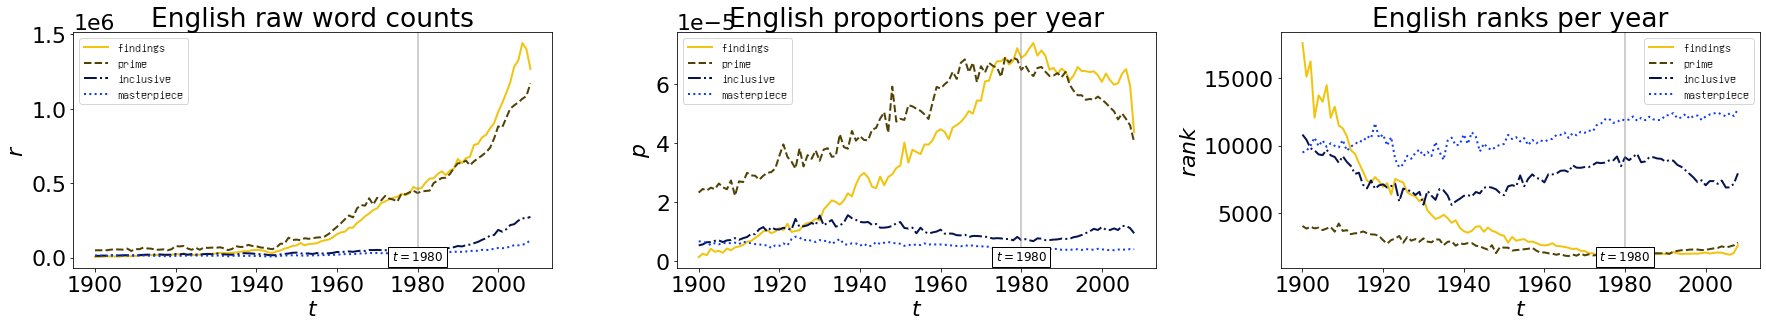

In [8]:
selected_time_series = np.random.choice(LA['eng']['rscore'].index,4)
selected_time_point = [[[1980]],[r'$t = 1980$']]

# FIGURE: selected time series
fig, ax = plt.subplots(1,3,figsize=(25,5))
lp.time_series_plot(data=LA['eng']['rscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$r$',title='English raw word counts',color='#F1C40F',
               annotation=True,annotation_parameters=selected_time_point,ax=ax[0])
lp.time_series_plot(data=LA['eng']['pscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$p$',title='English proportions per year',color='#F1C40F',
               annotation=True,annotation_parameters=selected_time_point,ax=ax[1])
lp.time_series_plot(data=LA_RANKS['eng']['ranks'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$rank$',title='English ranks per year',color='#F1C40F',
               annotation=True,annotation_parameters=selected_time_point,ax=ax[2])
plt.tight_layout()
plt.savefig('figures/rank-change/multiple-time-series-ranks_eng_random-selected-time-series_1x3.png')
plt.show()

### 1.2. Wright-Fisher Simulations.

In [9]:
# fixed and varied parameters
c = 1000 # vocabulary words
a = 1 # Zipf parameter
alpha = 0.01 #0.024 # corpus size rate of change
beta = 100000 # initial corpus size
T = 109 # total time elapsed (years)
all_params = {}
all_labels = {}
all_variab = {}
WF = {}
WF_RANKS = {}
color_wf = '#F1C40F'

In [10]:
# alpha varies
print('alpha varies...')
alpha_vect = [0.01,0.015,0.020,0.025,0.030]
alpha_wf_vect = []
alpha_wf_ranks_vect = []
for i in alpha_vect:
    pre_sim = pkl.load(open(precomp_wf_dir+'/wf_c'+str(c)+'_a'+str(a)+'_alpha'+str(i)+'_beta'+str(beta)+'_T'+str(T)+'.pkl','rb'))
    alpha_wf_vect.append(pre_sim)
    pre_sim = pkl.load(open(precomp_rc_dir+'/ranks_wf_c'+str(c)+'_a'+str(a)+'_alpha'+str(i)+'_beta'+str(beta)+'_T'+str(T)+'.pkl','rb'))
    alpha_wf_ranks_vect.append(pre_sim)
WF['alpha'] = alpha_wf_vect
WF_RANKS['alpha'] = alpha_wf_ranks_vect
all_params['alpha'] = alpha_vect
all_labels['alpha'] = 'WF CASE 1 \n*Corpus size rate varies*'+'\nFixed parameters:'+'\n'+r'$a = $'+str(a)+r', $c = $'+str(c)+'\n'+r'$\beta = $'+str(beta)+r', $T = $'+str(T)
all_variab['alpha'] = r'$\mathbf{\alpha = }$'

# beta varies
print('beta varies...')
beta_vect = [100000,200000,300000,400000,800000]
beta_wf_vect = []
beta_wf_ranks_vect = []
for i in beta_vect:
    pre_sim = pkl.load(open(precomp_wf_dir+'/wf_c'+str(c)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(i)+'_T'+str(T)+'.pkl','rb'))
    beta_wf_vect.append(pre_sim)
    pre_sim = pkl.load(open(precomp_rc_dir+'/ranks_wf_c'+str(c)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(i)+'_T'+str(T)+'.pkl','rb'))
    beta_wf_ranks_vect.append(pre_sim)
WF['beta'] = beta_wf_vect
WF_RANKS['beta'] = beta_wf_ranks_vect
all_params['beta'] = beta_vect
all_labels['beta'] = 'WF CASE 2 \n*Initial corpus size varies*'+'\nFixed parameters:'+'\n'+r'$a = $'+str(a)+r', $c = $'+str(c)+'\n'+r'$\alpha = $'+str(alpha)+r', $T = $'+str(T)
all_variab['beta'] = r'$\mathbf{\beta = }$'

# c varies
print('c varies...')
c_vect = [1000,2000,3000,4000,8000]
c_wf_vect = []
c_wf_ranks_vect = []
for i in c_vect:
    pre_sim = pkl.load(open(precomp_wf_dir+'/wf_c'+str(i)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(beta)+'_T'+str(T)+'.pkl','rb'))
    c_wf_vect.append(pre_sim)
    pre_sim = pkl.load(open(precomp_rc_dir+'/ranks_wf_c'+str(i)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(beta)+'_T'+str(T)+'.pkl','rb'))
    c_wf_ranks_vect.append(pre_sim)
WF['c'] = c_wf_vect
WF_RANKS['c'] = c_wf_ranks_vect
all_params['c'] = c_vect
all_labels['c'] = 'WF CASE 3 \n*Vocabulary size varies*'+'\nFixed parameters:'+'\n'+r'$a = $'+str(a)+r', $\alpha = $'+str(alpha)+'\n'+r'$\beta = $'+str(beta)+r', $T = $'+str(T)
all_variab['c'] = r'$\mathbf{c = }$'

# ratio c/beta = 0.01
print('ratio c/beta = 0.01...')
ratio1_vect = [c_vect[i]/beta_vect[i] for i in range(len(c_vect))]
ratio1_wf_vect = []
ratio1_wf_ranks_vect = []
for i, j in enumerate(c_vect):
    pre_sim = pkl.load(open(precomp_wf_dir+'/wf_c'+str(j)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(int(beta_vect[i]))+'_T'+str(T)+'.pkl','rb'))
    ratio1_wf_vect.append(pre_sim)
    pre_sim = pkl.load(open(precomp_rc_dir+'/ranks_wf_c'+str(j)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(int(beta_vect[i]))+'_T'+str(T)+'.pkl','rb'))
    ratio1_wf_ranks_vect.append(pre_sim)
WF['ratio1'] = ratio1_wf_vect
WF_RANKS['ratio1'] = ratio1_wf_ranks_vect
all_params['ratio1'] = [str(c_vect[i])+'/'+str(beta_vect[i]) for i in range(len(c_vect))]
all_labels['ratio1'] = 'WF CASE 4 \n*Constant ratio (0.01)*'+'\nFixed parameters:'+'\n'+r'$a = $'+str(a)+r', $\alpha = $'+str(alpha)+'\n'+r'$T = $'+str(T)
all_variab['ratio1'] = r'$\mathbf{c/\beta = }$'

# ratio c/beta = 0.05
print('ratio c/beta = 0.05...')
beta2_vect = [i/0.05 for i in c_vect]
ratio2_vect = [c_vect[i]/beta2_vect[i] for i in range(len(c_vect))]
ratio2_wf_vect = []
ratio2_wf_ranks_vect = []
for i, j in enumerate(c_vect):
    pre_sim = pkl.load(open(precomp_wf_dir+'/wf_c'+str(j)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(int(beta2_vect[i]))+'_T'+str(T)+'.pkl','rb'))
    ratio2_wf_vect.append(pre_sim)
    pre_sim = pkl.load(open(precomp_rc_dir+'/ranks_wf_c'+str(j)+'_a'+str(a)+'_alpha'+str(alpha)+'_beta'+str(int(beta2_vect[i]))+'_T'+str(T)+'.pkl','rb'))
    ratio2_wf_ranks_vect.append(pre_sim)
WF['ratio2'] = ratio2_wf_vect
WF_RANKS['ratio2'] = ratio2_wf_ranks_vect
all_params['ratio2'] = [str(c_vect[i])+'/'+str(int(beta2_vect[i])) for i in range(len(c_vect))]
all_labels['ratio2'] = 'WF CASE 5 \n*Constant ratio (0.05)*'+'\nFixed parameters:'+'\n'+r'$a = $'+str(a)+r', $\alpha = $'+str(alpha)+'\n'+r'$T = $'+str(T)
all_variab['ratio2'] = r'$\mathbf{c/\beta = }$'

# Zipf parameter varies
print('Zipf parameter varies...')
a_vect = [0.70,0.80,0.90,1,1.10]
a_wf_vect = []
a_wf_ranks_vect = []
for i in a_vect:
    pre_sim = pkl.load(open(precomp_wf_dir+'/wf_c'+str(c)+'_a'+str(i)+'_alpha'+str(alpha)+'_beta'+str(beta)+'_T'+str(T)+'.pkl','rb'))
    a_wf_vect.append(pre_sim)
    pre_sim = pkl.load(open(precomp_rc_dir+'/ranks_wf_c'+str(c)+'_a'+str(i)+'_alpha'+str(alpha)+'_beta'+str(beta)+'_T'+str(T)+'.pkl','rb'))
    a_wf_ranks_vect.append(pre_sim)
WF['a'] = a_wf_vect
WF_RANKS['a'] = a_wf_ranks_vect
all_params['a'] = a_vect
all_labels['a'] = 'WF CASE 6 \n*Zipf parameter varies*'+'\nFixed parameters:'+'\n'+r'$c = $'+str(c)+r', $\alpha = $'+str(alpha)+'\n'+r'$\beta = $'+str(beta)+r', $T = $'+str(T)
all_variab['a'] = r'$\mathbf{a = }$'

alpha varies...
beta varies...
c varies...
ratio c/beta = 0.01...
ratio c/beta = 0.05...
Zipf parameter varies...


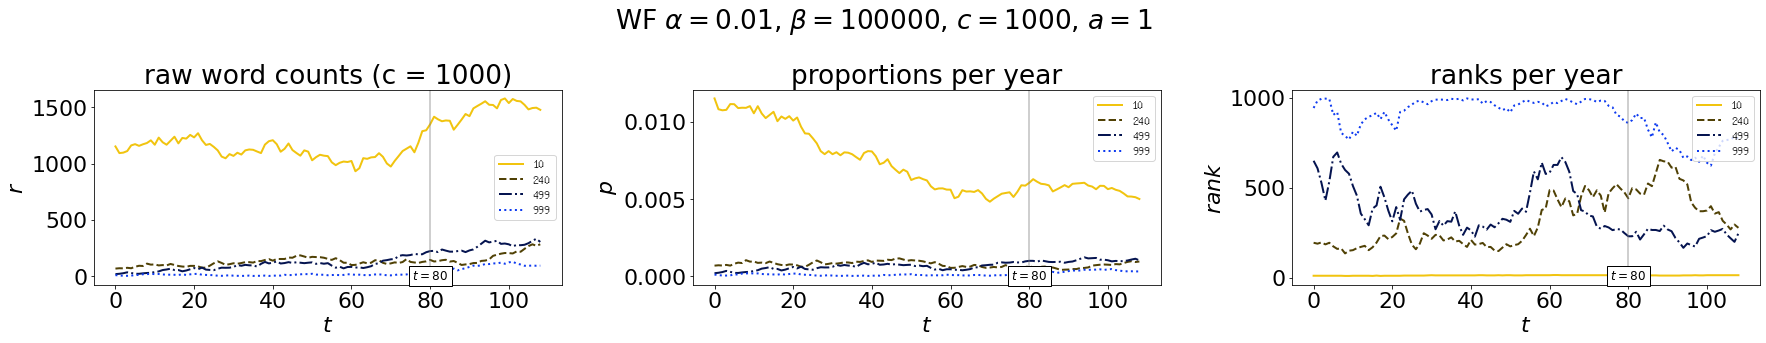

In [11]:
# selected time series for visualization
selected_time_series = [10,240,499,999]
selected_time_point = [[[80]],[r'$t = 80$']]

# FIGURE: selected time series
fig, ax = plt.subplots(1,3,figsize=(25,5))
lp.time_series_plot(data=WF['alpha'][0]['rscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$r$',title='raw word counts (c = '+str(c)+')',color=color_wf,
               annotation=True,annotation_parameters=selected_time_point,ax=ax[0])
lp.time_series_plot(data=WF['alpha'][0]['pscore'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$p$',title='proportions per year',color=color_wf,
               annotation=True,annotation_parameters=selected_time_point,ax=ax[1])
lp.time_series_plot(data=WF_RANKS['alpha'][0]['ranks'].loc[selected_time_series,:].T,xlabel=r'$t$',ylabel=r'$rank$',title='ranks per year',color=color_wf,
               annotation=True,annotation_parameters=selected_time_point,ax=ax[2])
plt.suptitle(r'WF $\alpha=$'+str(alpha)+r', $\beta=$'+str(beta)+r', $c=$'+str(c)+r', $a=$'+str(a)+'\n')
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.savefig('figures/rank-change/multiple-time-series-ranks_wf_'+'-'.join([str(i) for i in selected_time_series])+'_1x3.png')
plt.show()

## 2. Rank Change Distributions and Word Lists.

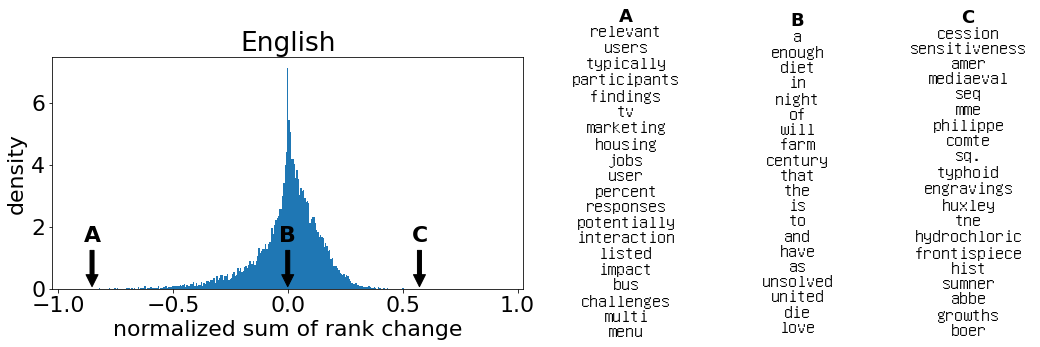

In [12]:
top_n = 20
middle_n = 20
bottom_n = 20
for l in ['eng']: #l_codes:
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    ds_all = LA_RANKS[l]['drank-sum']
    al_vals = {}
    for i in ds_all.keys(): 
        al_vals[i] = ds_all[i]/len(ds_all)
    al_vals = pd.DataFrame({'drank-sum':al_vals})
    sorted_al_vals = np.array(al_vals.sort_values(by='drank-sum').index)
    sorted_al_vals_abs = np.array(abs(al_vals).sort_values(by='drank-sum').index)
    min_val = np.min(al_vals).values
    max_val = np.max(al_vals).values
    
    text_bottom = r'$\mathbf{A}$'+' \n'+'\n'.join(sorted_al_vals[:bottom_n])
    text_middle = r'$\mathbf{B}$'+' \n'+'\n'.join(sorted_al_vals_abs[:middle_n])
    text_top = r'$\mathbf{C}$'+' \n'+'\n'.join(sorted_al_vals[-top_n:])
        
    ax[0].hist(al_vals.values,bins=250,density=True,color=l_colors[l])
    ax[0].annotate('A', xy=(min_val, 0), xytext=(min_val, 1.5),ha='center',
                   arrowprops=dict(facecolor='black', shrink=0.05),fontweight='bold')
    ax[0].annotate('B', xy=(0, 0), xytext=(0, 1.5),ha='center',
                   arrowprops=dict(facecolor='black', shrink=0.05),fontweight='bold')
    ax[0].annotate('C', xy=(max_val, 0), xytext=(max_val, 1.5),ha='center',
                   arrowprops=dict(facecolor='black', shrink=0.05),fontweight='bold')
    ax[0].set_xlim(-1-0.025,1+0.025)
    ax[0].set_xlabel('normalized sum of rank change')
    ax[0].set_ylabel('density')
    ax[0].set_title(l_labels[l])
    ax[1].plot()
    ax[1].text(-0.04, 0, text_bottom, ha='center',va='center', wrap=True,fontproperties=fontP)
    ax[1].text(0, 0, text_middle, ha='center',va='center', wrap=True,fontproperties=fontP)
    ax[1].text(0.04, 0, text_top, ha='center',va='center', wrap=True,fontproperties=fontP)
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.savefig('figures/rank-change/rc-sum-distribution_list-of-words_'+l+'_1x2.png')
    plt.show()

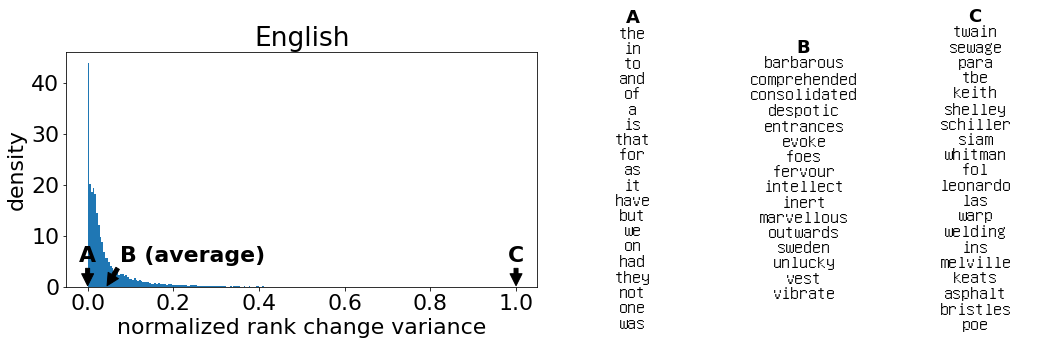

In [13]:
top_n = 20
percent_range = 0.0016
bottom_n = 20
for l in ['eng']:
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    al_vals = LA_RANKS[l]['drank-variance']
    al_vals = al_vals/np.max(abs(al_vals))
    sorted_al_vals = np.array(al_vals.sort_values().index)
    min_val = np.min(al_vals)
    mean_val = np.mean(al_vals)
    max_val = np.max(al_vals)
    
    range_logic = np.logical_and(al_vals>=mean_val-mean_val*percent_range, al_vals<=mean_val+mean_val*percent_range)
    mean_range_al_vals = np.array(al_vals[range_logic == True].index)
    
    text_bottom = r'$\mathbf{A}$'+' \n'+'\n'.join(sorted_al_vals[:bottom_n])
    text_mean = r'$\mathbf{B}$'+' \n'+'\n'.join(mean_range_al_vals)
    text_top = r'$\mathbf{C}$'+' \n'+'\n'.join(sorted_al_vals[-top_n:])
        
    ax[0].hist(al_vals.values,bins=250,density=True,color=l_colors[l])
    ax[0].annotate('A', xy=(min_val, 0), xytext=(min_val, 5),ha='center',
                   arrowprops=dict(facecolor='black', shrink=0.05),fontweight='bold')
    ax[0].annotate('B (average)', xy=(mean_val, 0), xytext=(mean_val+0.20, 5),ha='center',
                   arrowprops=dict(facecolor='black', shrink=0.05),fontweight='bold')
    ax[0].annotate('C', xy=(max_val, 0), xytext=(max_val, 5),ha='center',
                   arrowprops=dict(facecolor='black', shrink=0.05),fontweight='bold')
    ax[0].set_xlabel('normalized rank change variance')
    ax[0].set_ylabel('density')
    ax[0].set_title(l_labels[l])
    ax[1].plot()
    ax[1].text(-0.04, 0, text_bottom, ha='center',va='center', wrap=True,fontproperties=fontP)
    ax[1].text(0, 0, text_mean, ha='center',va='center', wrap=True,fontproperties=fontP)
    ax[1].text(0.04, 0, text_top, ha='center',va='center', wrap=True,fontproperties=fontP)
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.savefig('figures/rank-change/rc-variance-distribution_list-of-words_'+l+'_1x2.png')
    plt.show()

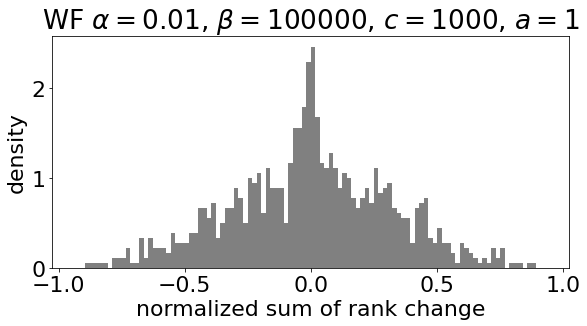

In [14]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
ds_all = WF_RANKS['alpha'][0]['drank-sum']
al_vals = {}
for i in ds_all.keys(): 
    al_vals[i] = ds_all[i]/len(ds_all)
al_vals = pd.DataFrame({'drank-sum':al_vals})

ax.hist(al_vals.values,bins=100,density=True,color='gray')
ax.set_xlim(-1-0.025,1+0.025)
ax.set_xlabel('normalized sum of rank change')
ax.set_ylabel('density')
ax.set_title(r'WF $\alpha=$'+str(alpha)+r', $\beta=$'+str(beta)+r', $c=$'+str(c)+r', $a=$'+str(a))

plt.tight_layout()
plt.savefig('figures/rank-change/rc-sum-distribution_wf.png')
plt.show()

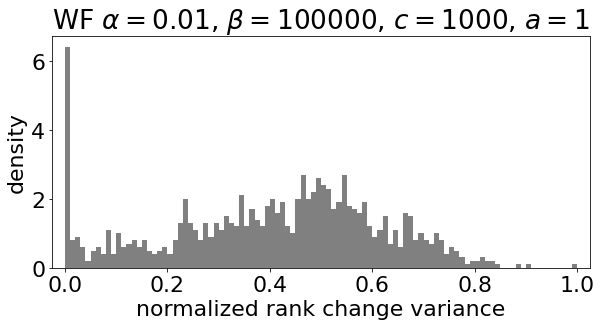

In [15]:
fig, ax = plt.subplots(1,1,figsize=(9,5))
al_vals = WF_RANKS['alpha'][0]['drank-variance']
al_vals = al_vals/np.max(abs(al_vals))

ax.hist(al_vals.values,bins=100,density=True,color='gray')
ax.set_xlim(0-0.025,1+0.025)
ax.set_xlabel('normalized rank change variance')
ax.set_ylabel('density')
ax.set_title(r'WF $\alpha=$'+str(alpha)+r', $\beta=$'+str(beta)+r', $c=$'+str(c)+r', $a=$'+str(a))

plt.tight_layout()
plt.savefig('figures/rank-change/rc-variance-distribution_wf.png')
plt.show()

## 2. Rank Change Sum Distributions with Stopwords and Swadesh Words.

In [16]:
SW_LA = {}
SD_LA = {}
for l in l_codes:
    
    if l in ['eng','eng-us','eng-gb','eng-fiction']:
        ll = 'eng'
    else:
        ll = l
    
    # stop-words
    try:
        with open('1gram-list/1gram-list-stop-word-'+ll, encoding="utf8") as sw:
            sw_list = sw.readlines()
        sw = []
        for i in sw_list:
            sw.append(i.replace('\n',''))
        SW_LA[l] = np.sort(list(set(list(LA[l]['rscore'].index)).intersection(set(sw))))
    except:
        SW_LA[l] = []
    
    # swadesh words
    try:
        with open('1gram-list/1gram-list-swadesh-'+ll, encoding="utf8") as sw:
            sd_list = sw.readlines()
        sd = []
        for i in sd_list:
            sd.append(i.replace('\n',''))
        SD_LA[l] = np.sort(list(set(list(LA[l]['rscore'].index)).intersection(set(sd))))
    except:
        SD_LA[l] = []

C:\Users\ajavq\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\ajavq\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


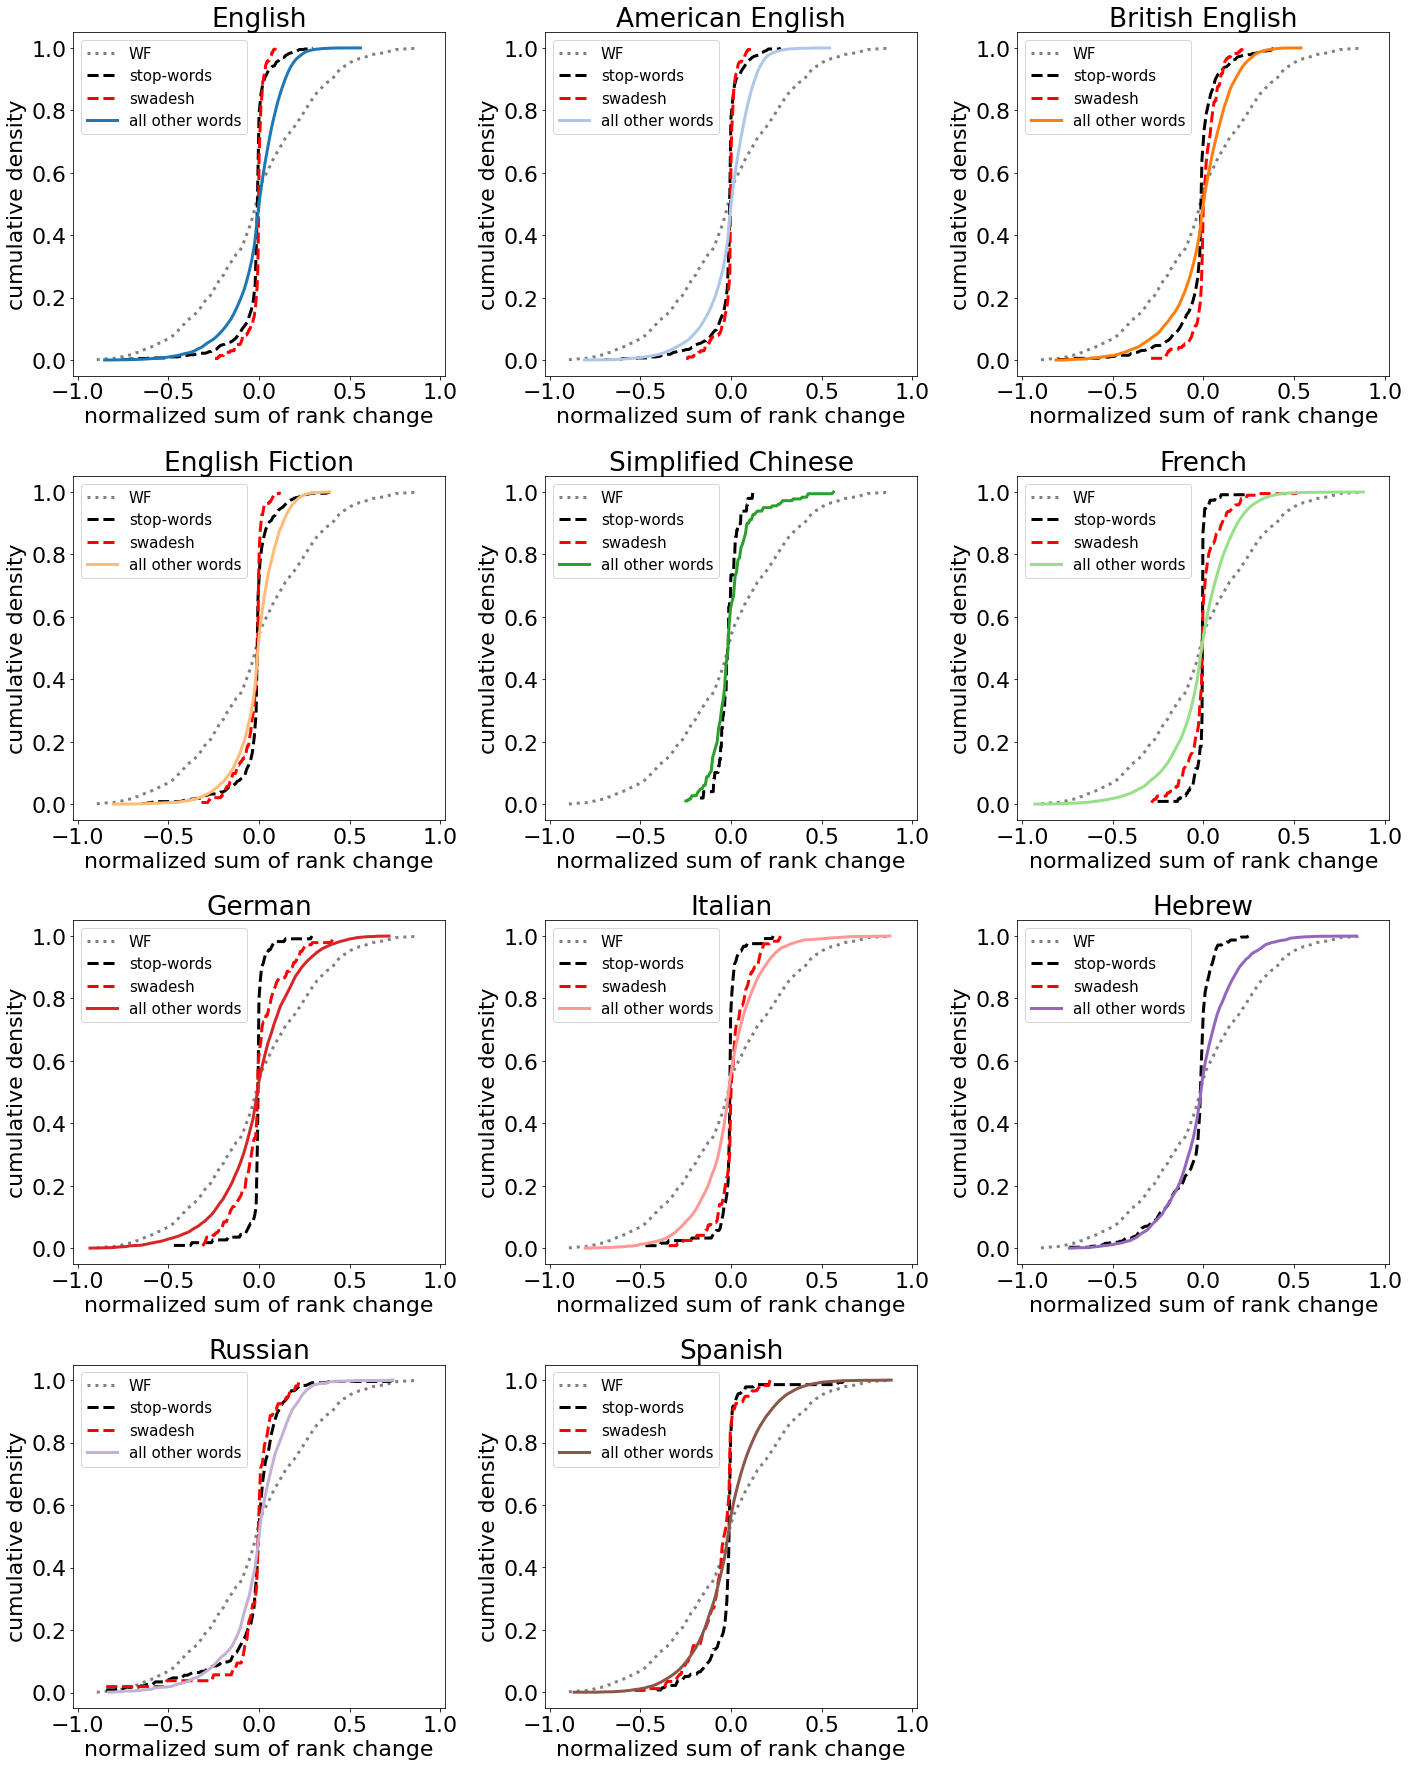

In [17]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
for l in l_codes:
    # LA
    rv_all = LA_RANKS[l]['drank-sum']
    sw_vals = {}
    sd_vals = {}
    al_vals = {}
    for i in rv_all.keys():
        normed_val = rv_all[i]/len(rv_all)
        if i in SW_LA[l]:
            sw_vals[i] = normed_val
        if i in SD_LA[l]:
            sd_vals[i] = normed_val
        if i not in SW_LA[l] or i not in SD_LA[l]:
            al_vals[i] = normed_val
    sw_hist, sw_base = np.histogram(list(sw_vals.values()),density=True,bins=100)
    sw_cumulative = np.cumsum(sw_hist)/np.max(np.cumsum(sw_hist))
    sd_hist, sd_base = np.histogram(list(sd_vals.values()),density=True,bins=100)
    sd_cumulative = np.cumsum(sd_hist)/np.max(np.cumsum(sd_hist))
    al_hist, al_base = np.histogram(list(al_vals.values()),density=True,bins=100)
    al_cumulative = np.cumsum(al_hist)/np.max(np.cumsum(al_hist))
            
    # WF
    wf_rv_all = WF_RANKS['alpha'][0]['drank-sum']
    wf_al_vals = {}
    for i in wf_rv_all.keys(): 
        wf_al_vals[i] = wf_rv_all[i]/len(wf_rv_all)
    wf_hist, wf_base = np.histogram(list(wf_al_vals.values()),density=True,bins=100)
    wf_cumulative = np.cumsum(wf_hist)/np.max(np.cumsum(wf_hist))
    
    # plots
    ax[l_plot_grids[l]].plot(wf_base[:-1],wf_cumulative,':',label='WF',linewidth=3,color='gray')
    ax[l_plot_grids[l]].plot(sw_base[:-1],sw_cumulative,'--',label='stop-words',linewidth=3,color='k')
    ax[l_plot_grids[l]].plot(sd_base[:-1],sd_cumulative,'--',label='swadesh',linewidth=3,color='red')
    ax[l_plot_grids[l]].plot(al_base[:-1],al_cumulative,'-',label='all other words',linewidth=3,color=l_colors[l])
    ax[l_plot_grids[l]].set_xlabel('normalized sum of rank change')
    ax[l_plot_grids[l]].set_xlim(-1-0.025,1+0.025)
    ax[l_plot_grids[l]].set_ylabel('cumulative density')
    ax[l_plot_grids[l]].set_title(l_labels[l])
    ax[l_plot_grids[l]].legend(loc=2,fontsize=15)

ax[3,2].axis('off')  
plt.tight_layout()
plt.savefig('figures/rank-change/rc-sum_cumulative-densities_la_4x3.png')
plt.show()

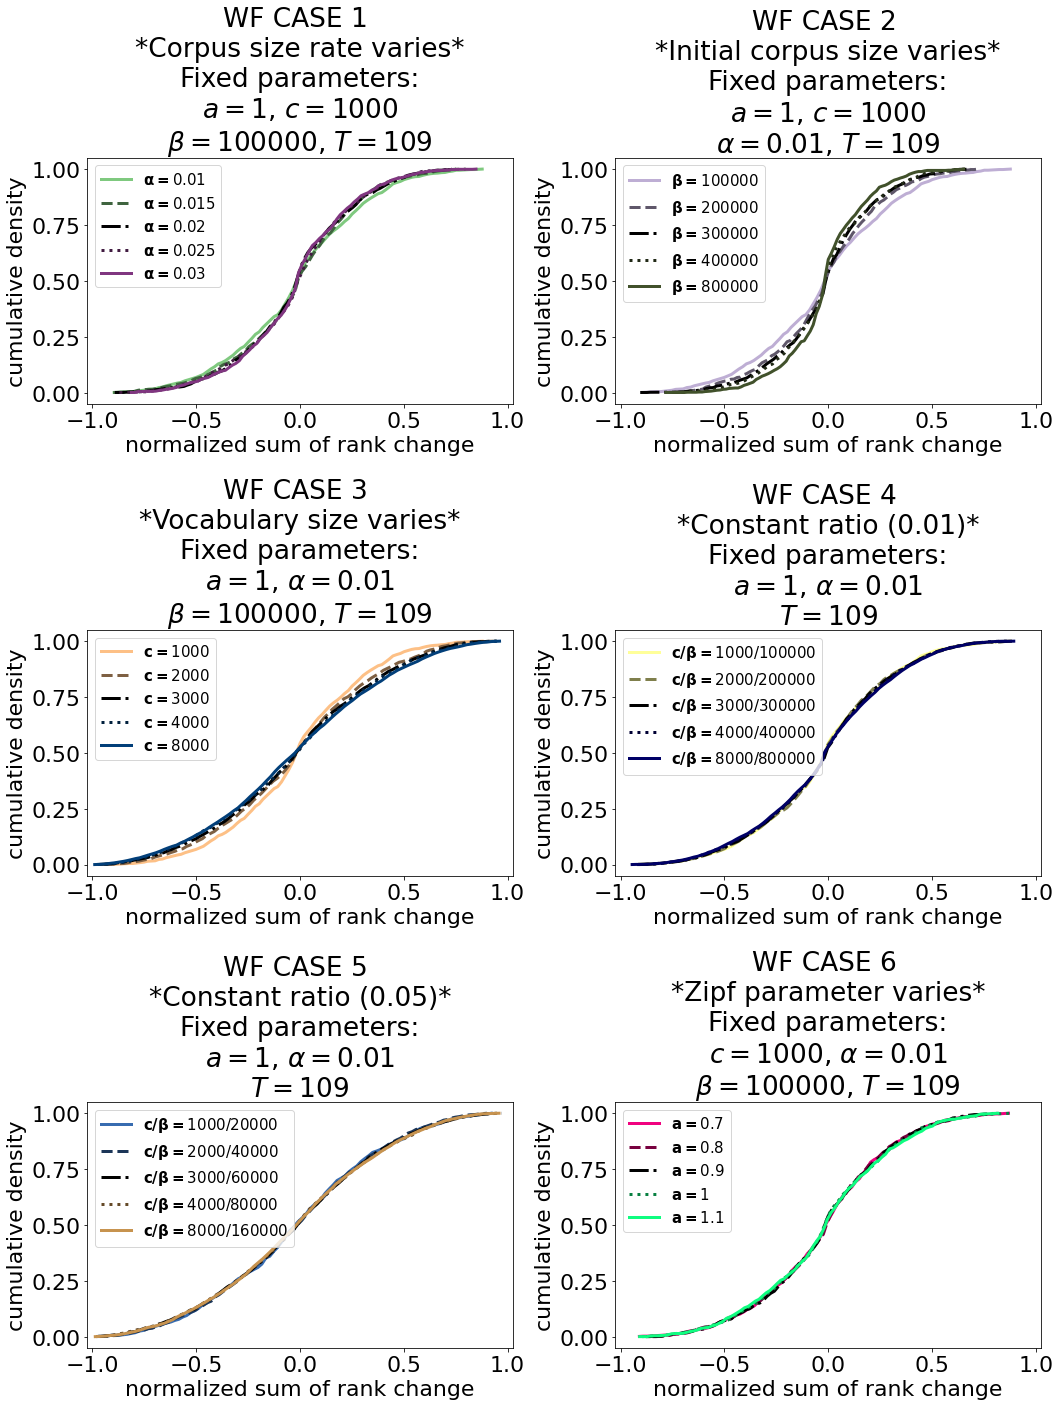

In [18]:
colors_accent = cm.get_cmap('Accent')
ax_vect = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
linestyles = ['-','--','-.',':','-']
fig, ax = plt.subplots(3,2,figsize=(15,20))
for kk, k in enumerate(WF_RANKS.keys()):
          
    color = cl.to_hex(colors_accent(kk))
    color_complement = lp.get_complementary(color)
    c = cl.ColorConverter().to_rgb
    c_cmap = lp.make_colormap([c(color), c('black'), 0.50, c('black'), c(color_complement)])
    index_color = c_cmap(np.linspace(0,1,5))
    
    for j in range(0,5):
        rv_all = WF_RANKS[k][j]['drank-sum']
        
        al_vals = {}
        for i in rv_all.keys(): 
            al_vals[i] = rv_all[i]/len(rv_all)
            
        al_hist, al_base = np.histogram(list(al_vals.values()),density=True,bins=100)
        al_cumulative = np.cumsum(al_hist)/np.max(np.cumsum(al_hist))
        wf_hist, wf_base = np.histogram(list(al_vals.values()),density=True,bins=100)
        wf_cumulative = np.cumsum(wf_hist)/np.max(np.cumsum(wf_hist))
        ax[ax_vect[kk]].plot(al_base[:-1],al_cumulative,linewidth=3,linestyle=linestyles[j],color=index_color[j],label=all_variab[k]+str(all_params[k][j]))

    ax[ax_vect[kk]].legend(loc=2,fontsize=15)
    ax[ax_vect[kk]].set_xlim(-1-0.025,1+0.025)
    ax[ax_vect[kk]].set_xlabel('normalized sum of rank change')
    ax[ax_vect[kk]].set_ylabel('cumulative density')
    ax[ax_vect[kk]].set_title(all_labels[k])
plt.tight_layout()
plt.savefig('figures/rank-change/rc-sum_cumulative-densities_wf_3x2.png')
plt.show()

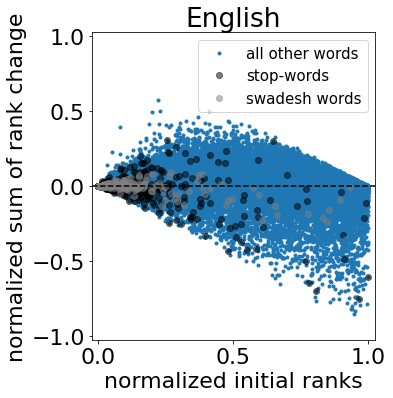

In [19]:
l = 'eng'
dayta = LA_RANKS[l]

initial_ranks = dayta['ranks'][1900].sort_index()
initial_ranks_normed = initial_ranks.values / len(initial_ranks.values)
initial_ranks_sw = initial_ranks[SW_LA[l]]
initial_ranks_sw_normed = initial_ranks_sw.values / len(initial_ranks.values)
initial_ranks_sd = initial_ranks[SD_LA[l]]
initial_ranks_sd_normed = initial_ranks_sd.values / len(initial_ranks.values)
drank_sum = dayta['drank-sum'].sort_index()
drank_sum_normed = np.array(drank_sum.values) / len(np.array(drank_sum.values))
drank_sum_sw = drank_sum[SW_LA[l]]
drank_sum_sw_normed = np.array(drank_sum_sw.values) / len(np.array(drank_sum.values))
drank_sum_sd = drank_sum[SD_LA[l]]
drank_sum_sd_normed = np.array(drank_sum_sd.values) / len(np.array(drank_sum.values))

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(initial_ranks_normed,drank_sum_normed,'.',color=l_colors[l],label='all other words')
ax.plot(initial_ranks_sw_normed,drank_sum_sw_normed,'.',color='black',label='stop-words',markersize=12,alpha=0.50)
ax.plot(initial_ranks_sd_normed,drank_sum_sd_normed,'.',color='gray',label='swadesh words',markersize=12,alpha=0.50)
ax.axhline(0,linestyle='--',color='black')
ax.set_xlim(0-0.025,1+0.025)
ax.set_ylim(-1-0.025,1+0.025)
ax.set_xlabel('normalized initial ranks')
ax.set_ylabel('normalized sum of rank change')
ax.set_title(l_labels[l])
ax.legend(loc=1,fontsize=15)

plt.tight_layout()
plt.savefig('figures/rank-change/rc-sum_vs_initial-ranks_'+l+'.png')
plt.show()

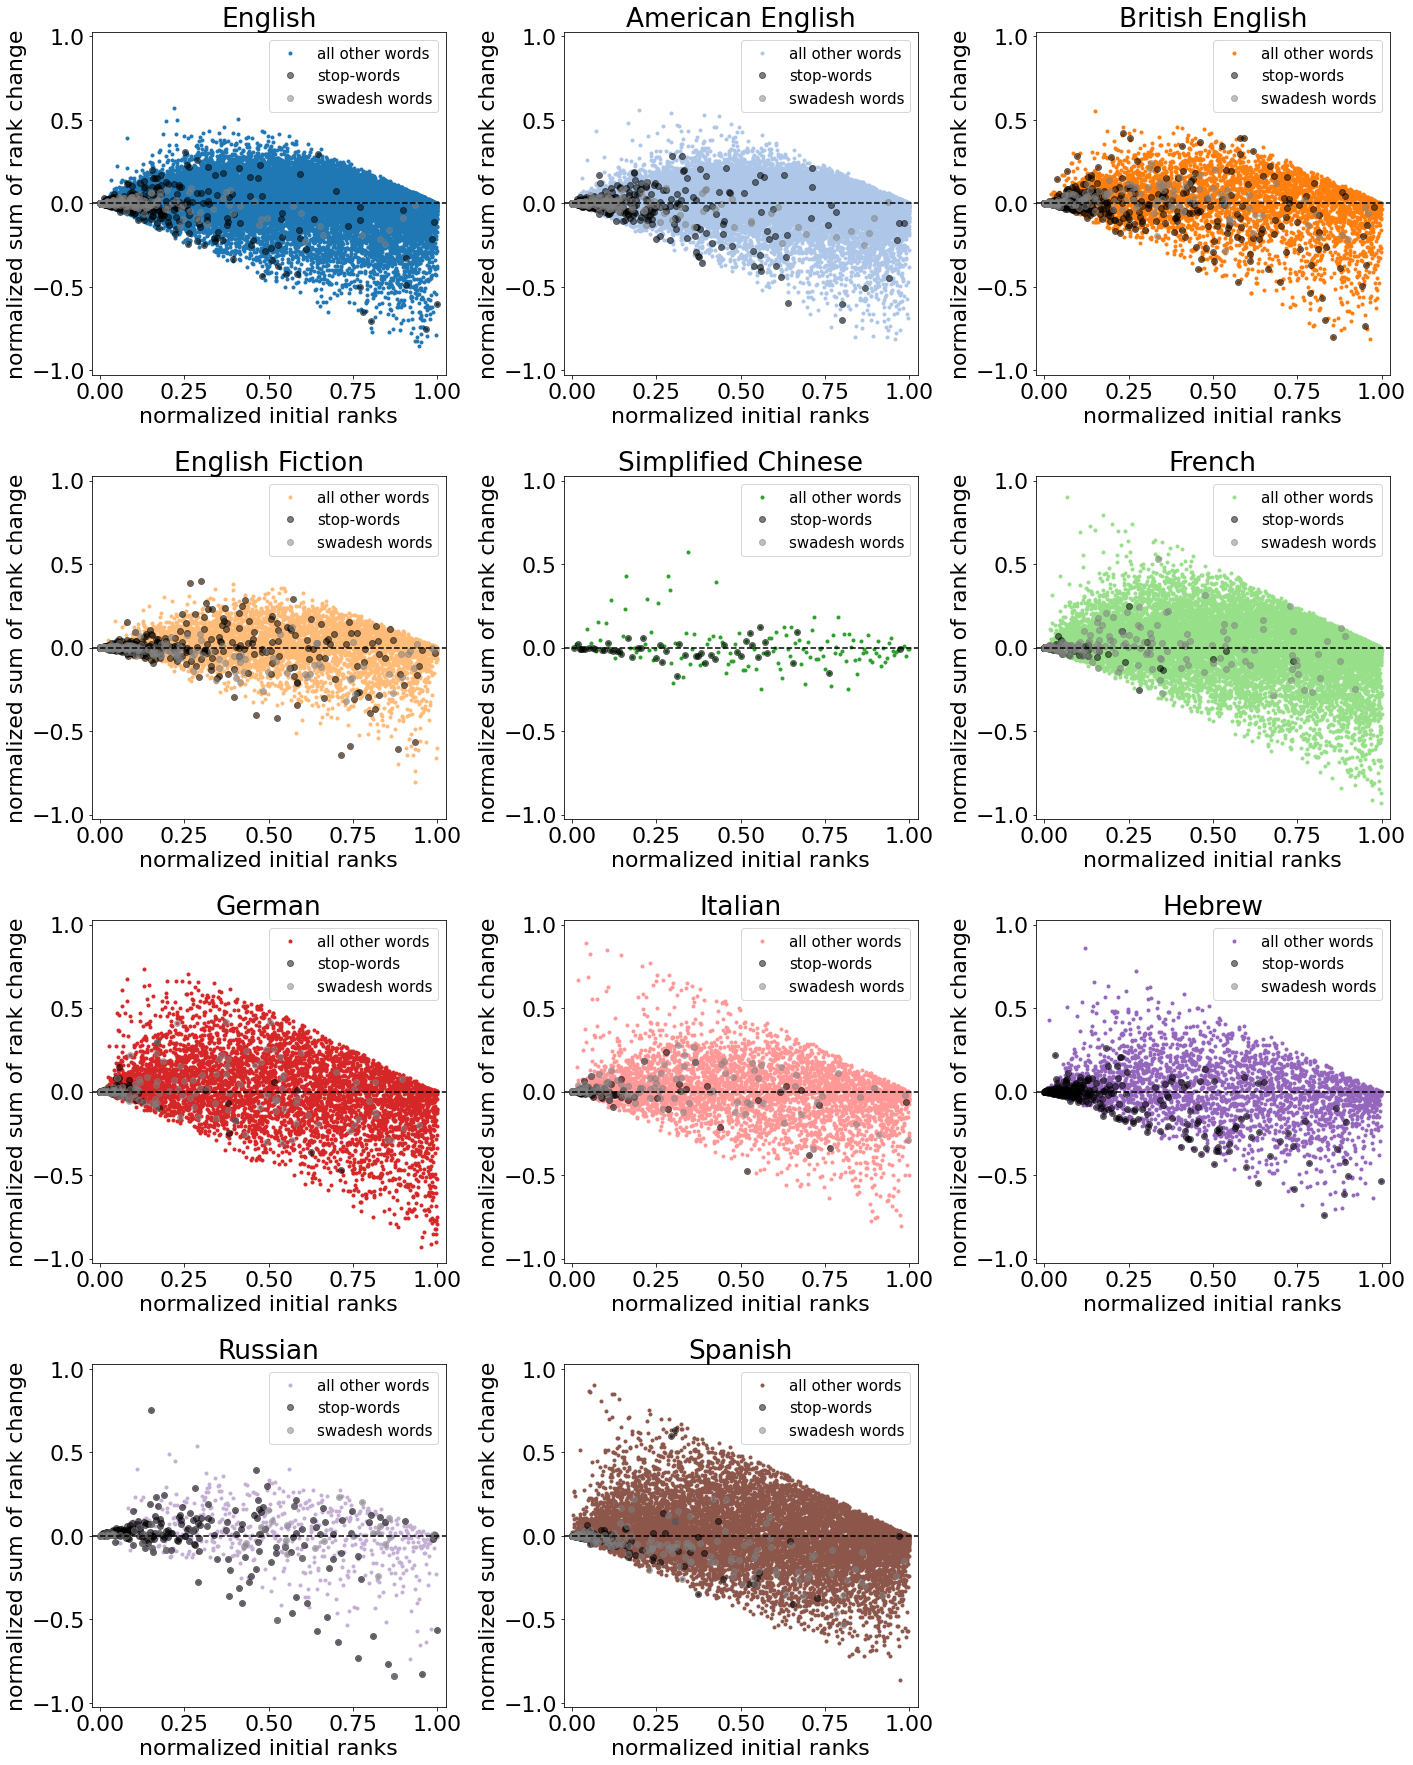

In [20]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
for l in l_codes:
    dayta = LA_RANKS[l]

    initial_ranks = dayta['ranks'][1900].sort_index()
    initial_ranks_normed = initial_ranks.values / len(initial_ranks.values)
    initial_ranks_sw = initial_ranks[SW_LA[l]]
    initial_ranks_sw_normed = initial_ranks_sw.values / len(initial_ranks.values)
    initial_ranks_sd = initial_ranks[SD_LA[l]]
    initial_ranks_sd_normed = initial_ranks_sd.values / len(initial_ranks.values)
    drank_sum = dayta['drank-sum'].sort_index()
    drank_sum_normed = np.array(drank_sum.values) / len(np.array(drank_sum.values))
    drank_sum_sw = drank_sum[SW_LA[l]]
    drank_sum_sw_normed = np.array(drank_sum_sw.values) / len(np.array(drank_sum.values))
    drank_sum_sd = drank_sum[SD_LA[l]]
    drank_sum_sd_normed = np.array(drank_sum_sd.values) / len(np.array(drank_sum.values))

    ax[l_plot_grids[l]].plot(initial_ranks_normed,drank_sum_normed,'.',color=l_colors[l],label='all other words')
    ax[l_plot_grids[l]].plot(initial_ranks_sw_normed,drank_sum_sw_normed,'.',color='black',label='stop-words',markersize=12,alpha=0.50)
    ax[l_plot_grids[l]].plot(initial_ranks_sd_normed,drank_sum_sd_normed,'.',color='gray',label='swadesh words',markersize=12,alpha=0.50)
    ax[l_plot_grids[l]].axhline(0,linestyle='--',color='black')
    ax[l_plot_grids[l]].set_xlim(0-0.025,1+0.025)
    ax[l_plot_grids[l]].set_ylim(-1-0.025,1+0.025)
    ax[l_plot_grids[l]].set_xlabel('normalized initial ranks')
    ax[l_plot_grids[l]].set_ylabel('normalized sum of rank change')
    ax[l_plot_grids[l]].set_title(l_labels[l])
    ax[l_plot_grids[l]].legend(loc=1,fontsize=15)

ax[3,2].axis('off')  
plt.tight_layout()
plt.savefig('figures/rank-change/rc-sum_vs_initial-ranks_la_4x3.png')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


alpha
beta
c
ratio1
ratio2
a


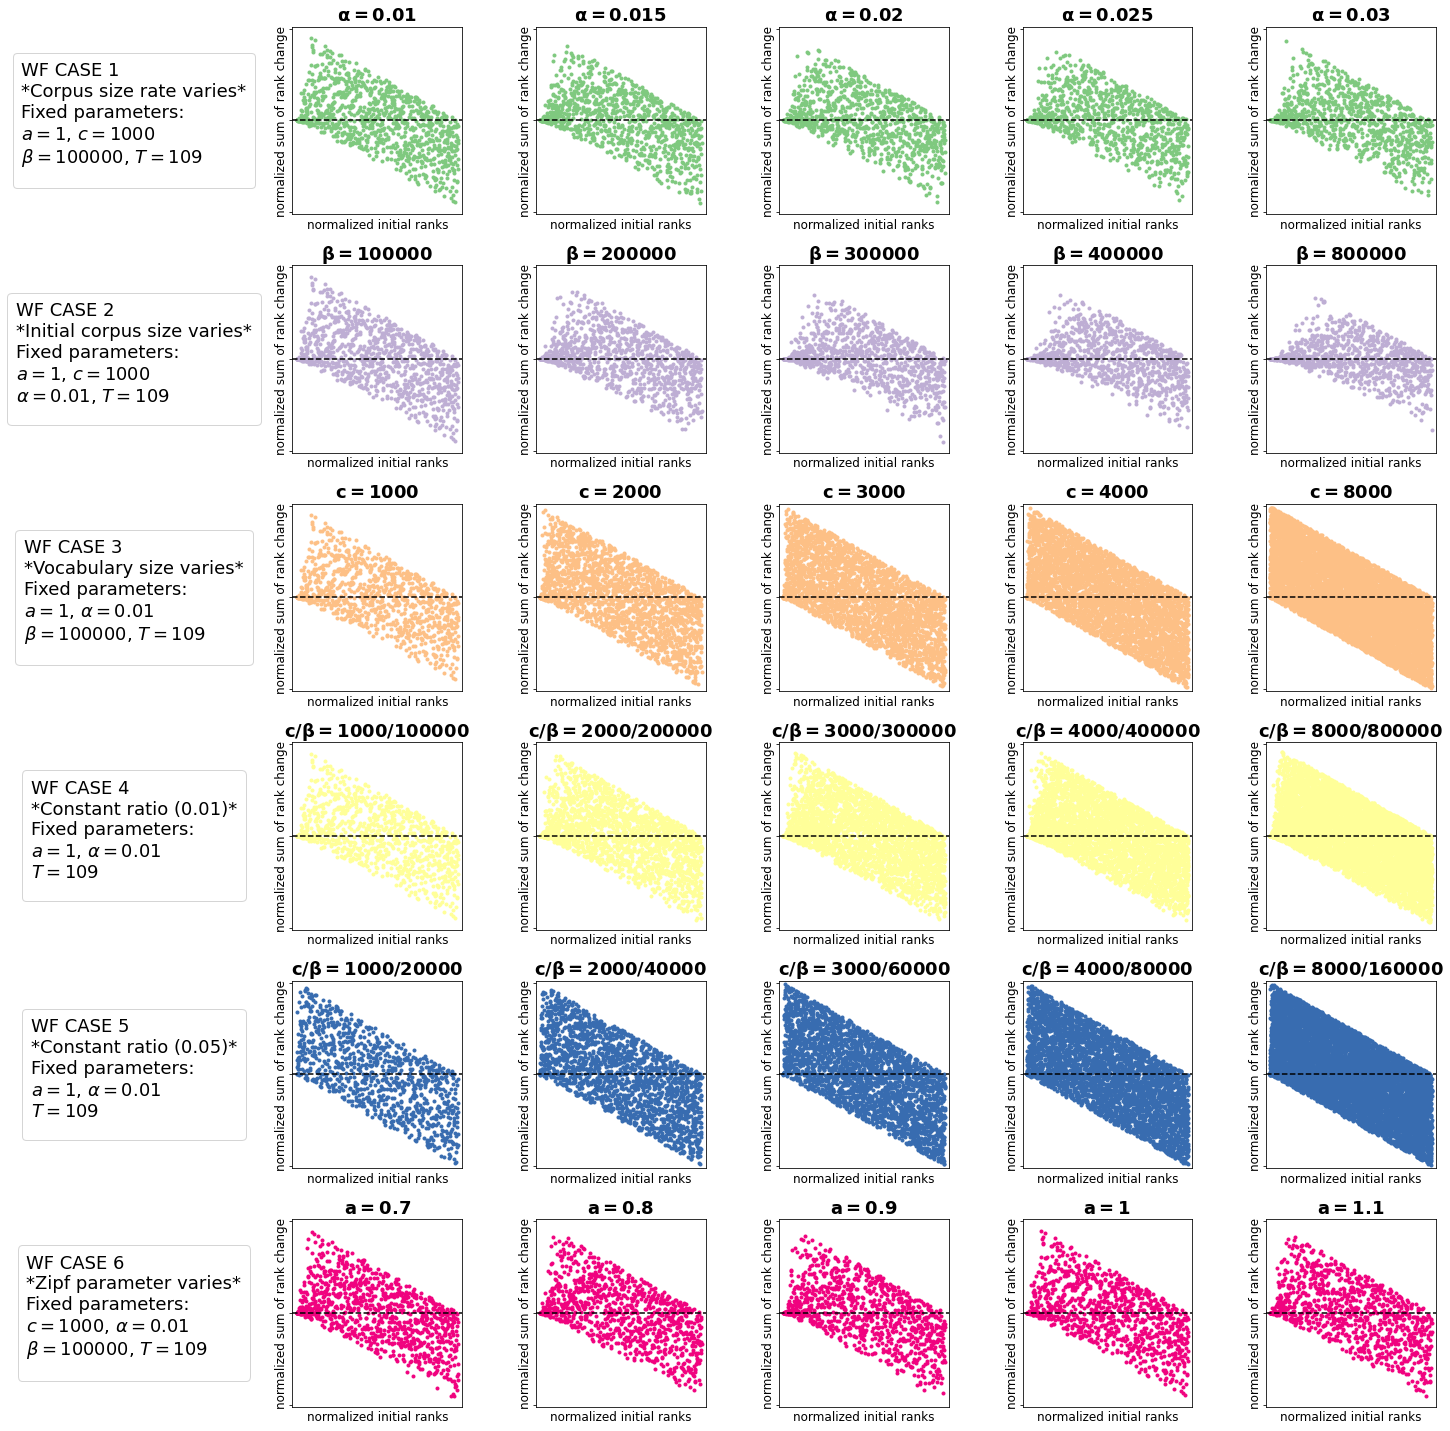

In [21]:
colors_accent = cm.get_cmap('Accent')
fig, ax = plt.subplots(6,6,figsize=(20.36,20),sharex=True,sharey=True)
for i, j in enumerate(WF_RANKS.keys()):
    ax[i,0].set_axis_off()
    ax[i,0].legend(loc=10,title=all_labels[j],title_fontsize=18)

for l, k in enumerate(WF_RANKS.keys()):
    print(k)
    for i, j in enumerate(all_params[k]):
        dayta = WF_RANKS[k][i]
        initial_ranks = dayta['ranks'][0].sort_index()
        initial_ranks_normed = initial_ranks.values / len(initial_ranks.values)
        drank_sum = dayta['drank-sum'].sort_index()
        drank_sum_normed = np.array(drank_sum.values) / len(np.array(drank_sum.values))

        ax[l,i+1].plot(initial_ranks_normed,drank_sum_normed,'.',color=colors_accent(l),label='all other words')
        ax[l,i+1].axhline(0,linestyle='--',color='black')
        ax[l,i+1].set_xlim(0-0.025,1+0.025)
        ax[l,i+1].set_ylim(-1-0.025,1+0.025)
        ax[l,i+1].set_xlabel('normalized initial ranks',fontsize=12)
        ax[l,i+1].set_ylabel('normalized sum of rank change',fontsize=12)
        ax[l,i+1].set_title(all_variab[k]+str(all_params[k][i]),fontweight='bold',fontsize=18)

ax[5,i+1].axes.get_xaxis().set_ticks([])
plt.tight_layout(pad=0.50)
plt.savefig('figures/rank-change/rc-sum_vs_initial-ranks_wf_6x6.png')
plt.show()

## 3. Rank Change Variance Distributions with Stopwords and Swadesh Words.

C:\Users\ajavq\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\Users\ajavq\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


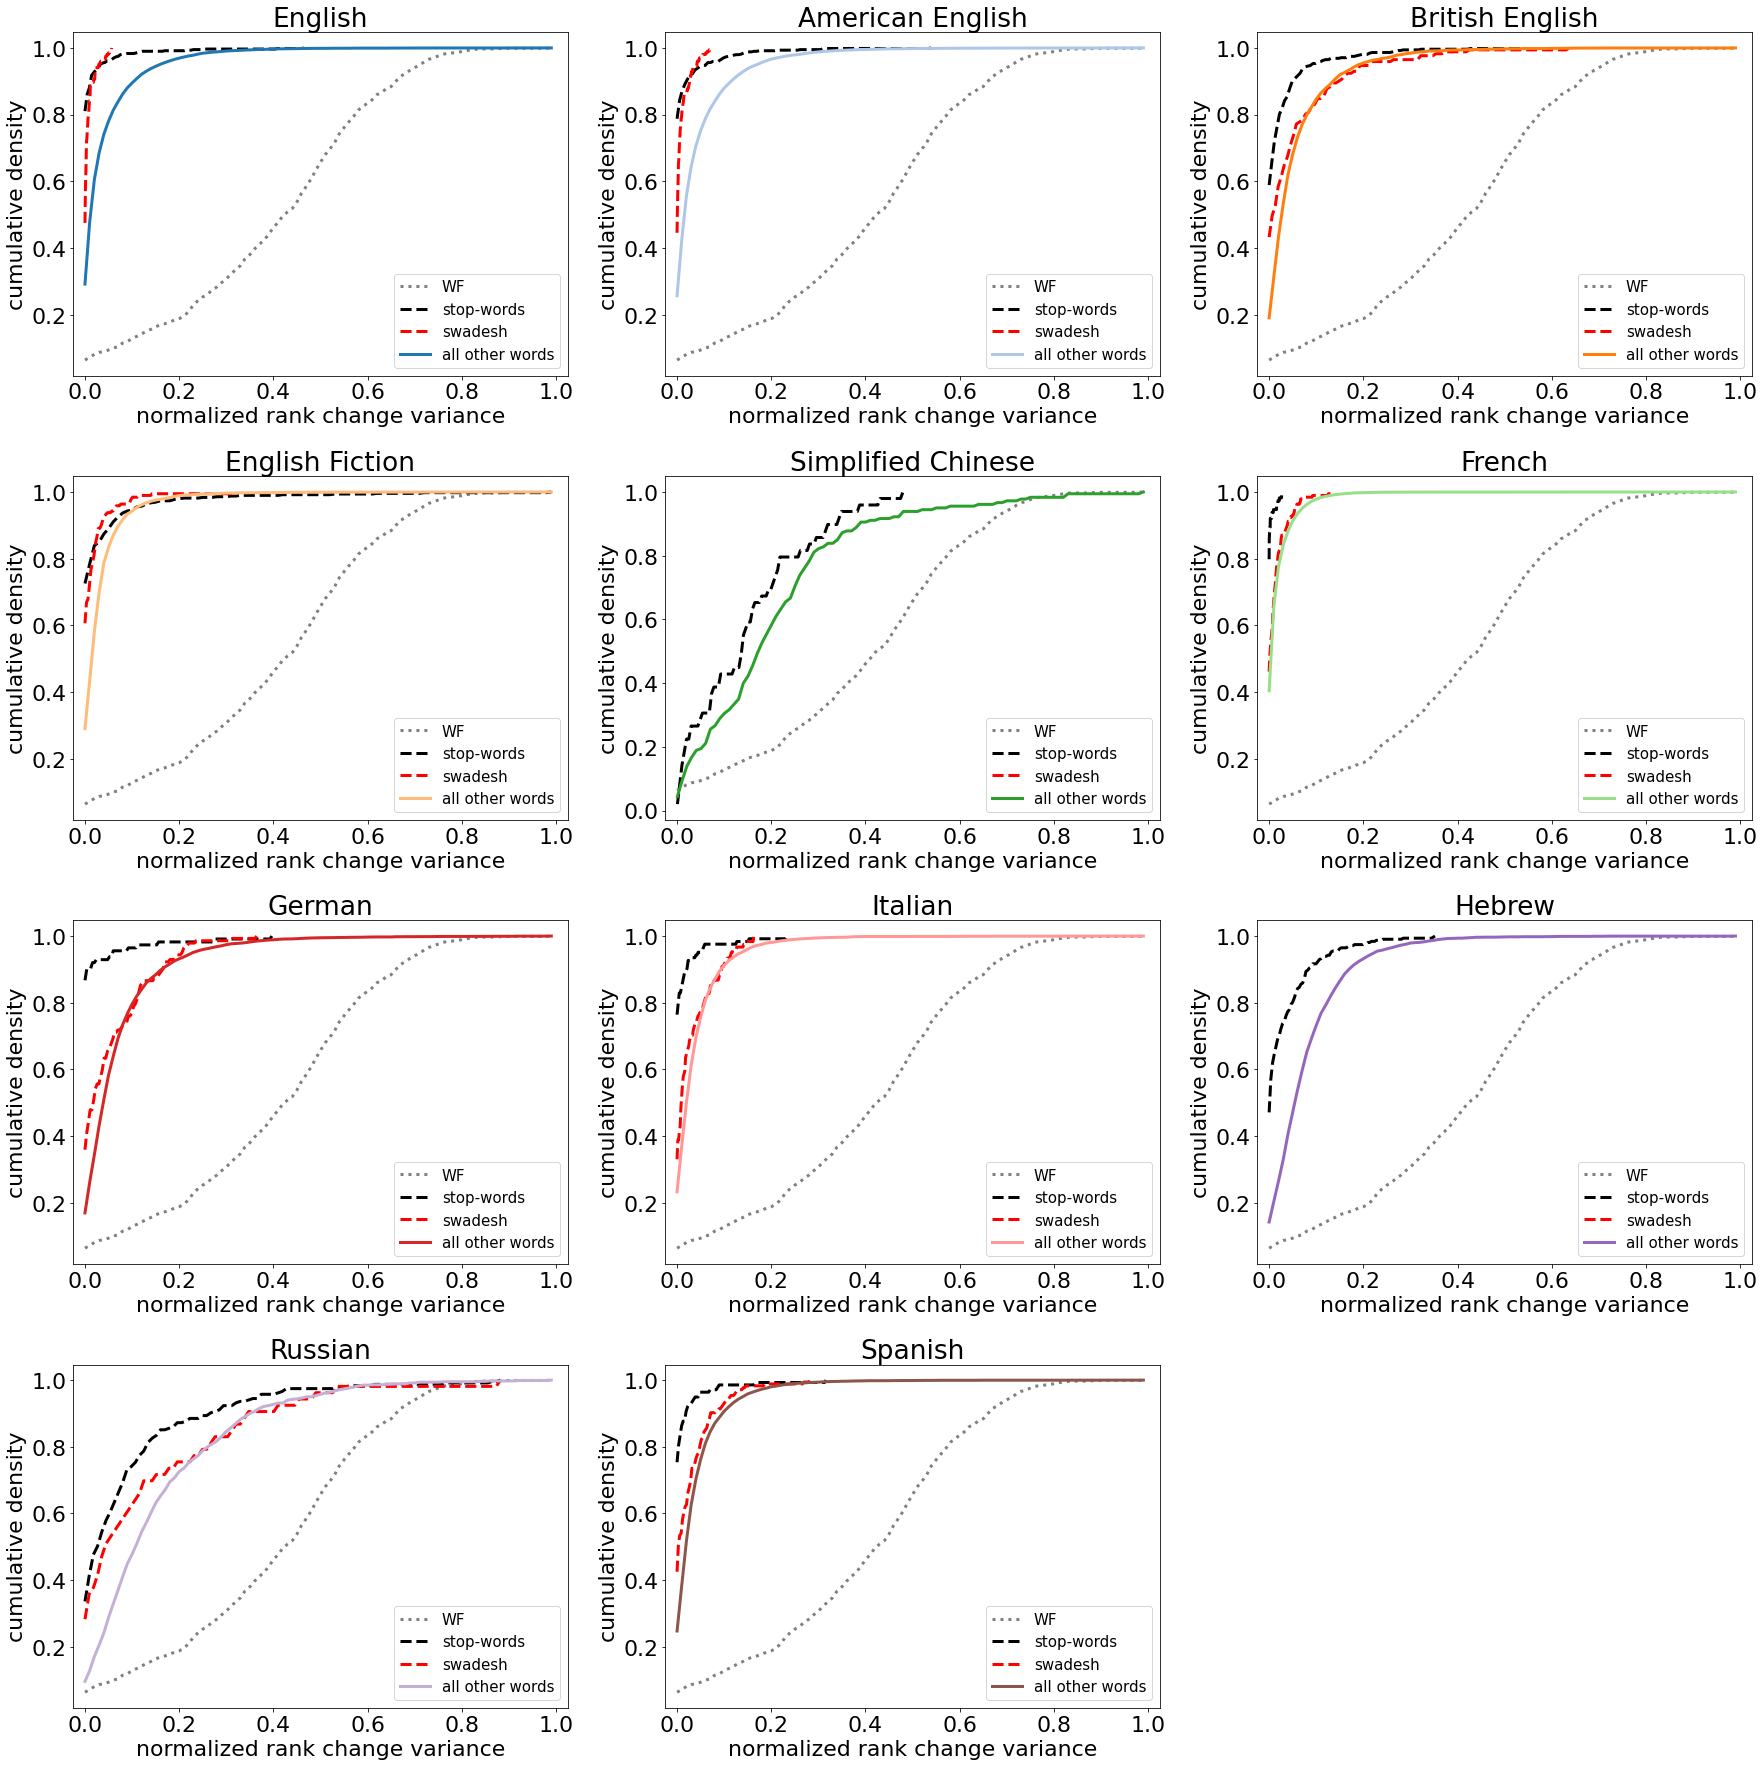

In [22]:
fig, ax = plt.subplots(4,3,figsize=(25,25))
for l in l_codes:
    # LA
    rv_all = LA_RANKS[l]['drank-variance']
    sw_vals = {}
    sd_vals = {}
    al_vals = {}
    max_norm = np.max(abs(rv_all))
    for i in rv_all.keys():
        normed_val = rv_all[i]/max_norm
        if i in SW_LA[l]:
            sw_vals[i] = normed_val
        if i in SD_LA[l]:
            sd_vals[i] = normed_val
        if i not in SW_LA[l] or i not in SD_LA[l]:
            al_vals[i] = normed_val
    sw_hist, sw_base = np.histogram(list(sw_vals.values()),density=True,bins=100)
    sw_cumulative = np.cumsum(sw_hist)/np.max(np.cumsum(sw_hist))
    sd_hist, sd_base = np.histogram(list(sd_vals.values()),density=True,bins=100)
    sd_cumulative = np.cumsum(sd_hist)/np.max(np.cumsum(sd_hist))
    al_hist, al_base = np.histogram(list(al_vals.values()),density=True,bins=100)
    al_cumulative = np.cumsum(al_hist)/np.max(np.cumsum(al_hist))
            
    # WF
    wf_rv_all = WF_RANKS['alpha'][0]['drank-variance']
    wf_al_vals = {}
    wf_max_norm = np.max(abs(wf_rv_all))
    for i in wf_rv_all.keys(): 
        wf_al_vals[i] = wf_rv_all[i]/wf_max_norm
    wf_hist, wf_base = np.histogram(list(wf_al_vals.values()),density=True,bins=100)
    wf_cumulative = np.cumsum(wf_hist)/np.max(np.cumsum(wf_hist))
    
    # plots
    ax[l_plot_grids[l]].plot(wf_base[:-1],wf_cumulative,':',label='WF',linewidth=3,color='gray')
    ax[l_plot_grids[l]].plot(sw_base[:-1],sw_cumulative,'--',label='stop-words',linewidth=3,color='k')
    ax[l_plot_grids[l]].plot(sd_base[:-1],sd_cumulative,'--',label='swadesh',linewidth=3,color='red')
    ax[l_plot_grids[l]].plot(al_base[:-1],al_cumulative,'-',label='all other words',linewidth=3,color=l_colors[l])
    ax[l_plot_grids[l]].set_xlabel('normalized rank change variance')
    ax[l_plot_grids[l]].set_xlim(0-0.025,1+0.025)
    ax[l_plot_grids[l]].set_ylabel('cumulative density')
    ax[l_plot_grids[l]].set_title(l_labels[l])
    ax[l_plot_grids[l]].legend(loc=4,fontsize=15)

ax[3,2].axis('off')  
plt.tight_layout()
plt.savefig('figures/rank-change/rc-variance_cumulative-densities_la_4x3.png')
plt.show()

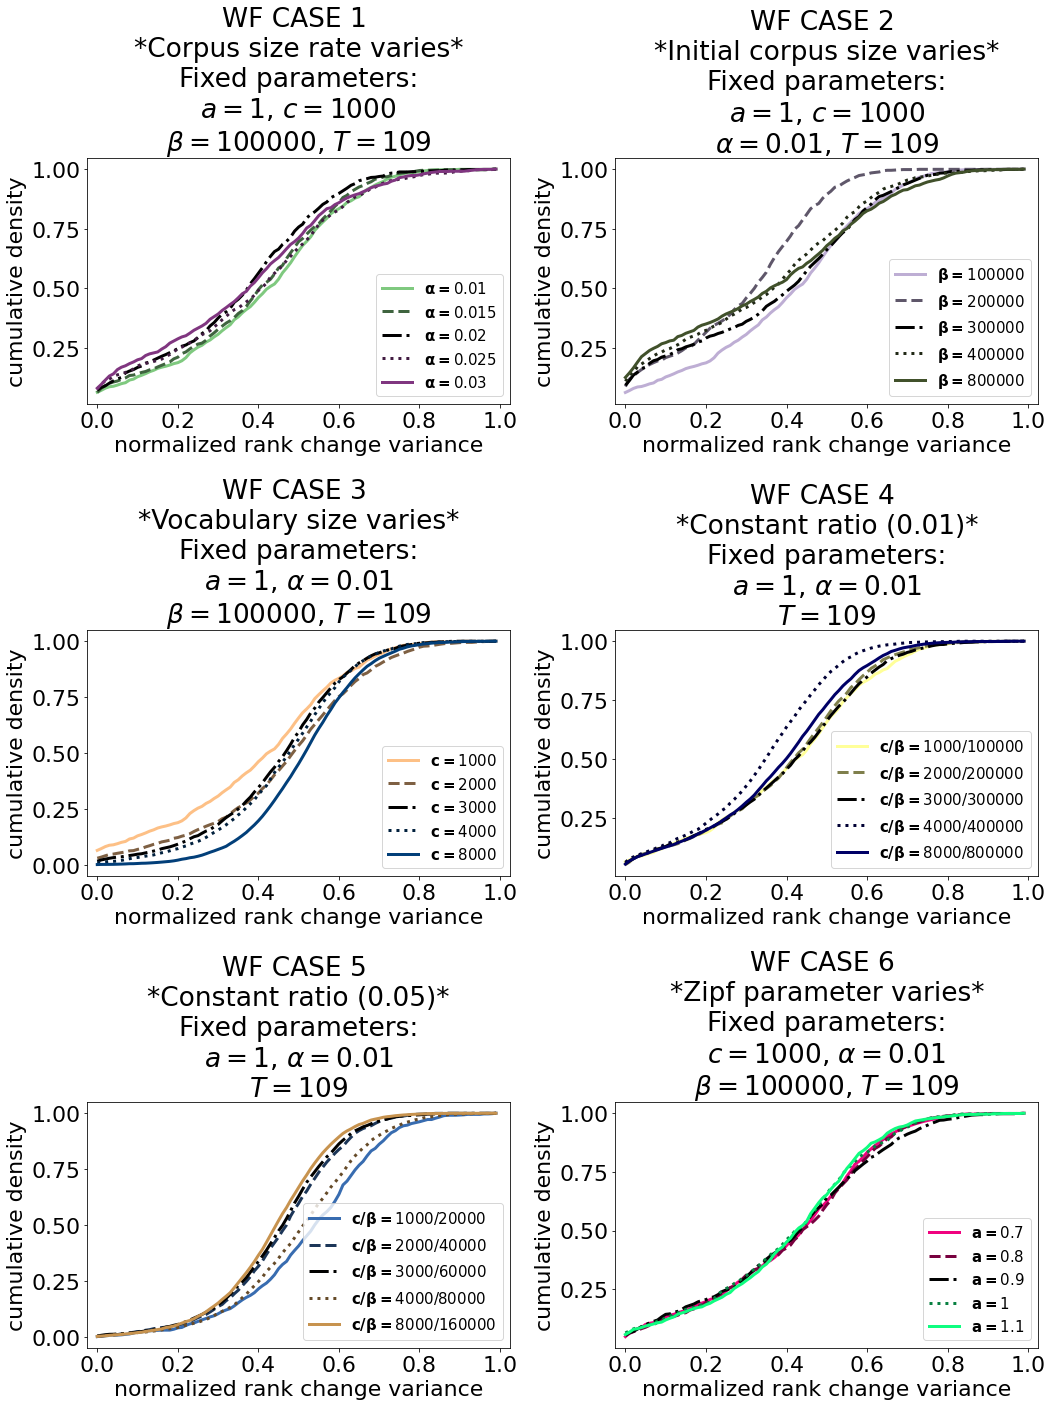

In [23]:
colors_accent = cm.get_cmap('Accent')
ax_vect = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
linestyles = ['-','--','-.',':','-']
fig, ax = plt.subplots(3,2,figsize=(15,20))
for kk, k in enumerate(WF_RANKS.keys()):
          
    color = cl.to_hex(colors_accent(kk))
    color_complement = lp.get_complementary(color)
    c = cl.ColorConverter().to_rgb
    c_cmap = lp.make_colormap([c(color), c('black'), 0.50, c('black'), c(color_complement)])
    index_color = c_cmap(np.linspace(0,1,5))
    
    for j in range(0,5):
        rv_all = WF_RANKS[k][j]['drank-variance']
        
        al_vals = {}
        max_norm = np.max(abs(rv_all))
        for i in rv_all.keys(): 
            al_vals[i] = rv_all[i]/max_norm
            
        al_hist, al_base = np.histogram(list(al_vals.values()),density=True,bins=100)
        al_cumulative = np.cumsum(al_hist)/np.max(np.cumsum(al_hist))
        wf_hist, wf_base = np.histogram(list(al_vals.values()),density=True,bins=100)
        wf_cumulative = np.cumsum(wf_hist)/np.max(np.cumsum(wf_hist))
        ax[ax_vect[kk]].plot(al_base[:-1],al_cumulative,linewidth=3,linestyle=linestyles[j],color=index_color[j],label=all_variab[k]+str(all_params[k][j]))

    ax[ax_vect[kk]].legend(loc=4,fontsize=15)
    ax[ax_vect[kk]].set_xlim(0-0.025,1+0.025)
    ax[ax_vect[kk]].set_xlabel('normalized rank change variance')
    ax[ax_vect[kk]].set_ylabel('cumulative density')
    ax[ax_vect[kk]].set_title(all_labels[k])
plt.tight_layout()
plt.savefig('figures/rank-change/rc-variance_cumulative-densities_wf_3x2.png')
plt.show()

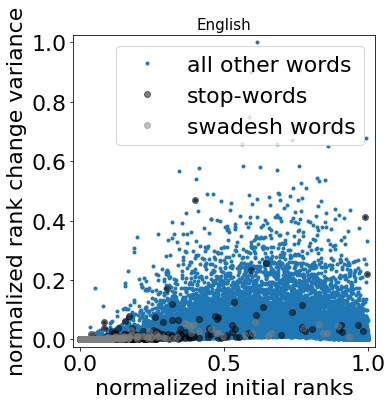

In [24]:
l = 'eng'
dayta = LA_RANKS[l]

initial_ranks = dayta['ranks'][1900].sort_index()
vocab_size = len(initial_ranks.values)
initial_ranks_normed = initial_ranks.values / vocab_size
initial_ranks_sw = initial_ranks[SW_LA[l]]
initial_ranks_sw_normed = initial_ranks_sw.values / vocab_size
initial_ranks_sd = initial_ranks[SD_LA[l]]
initial_ranks_sd_normed = initial_ranks_sd.values / vocab_size
drank_var = pd.DataFrame({'drank-variance':dayta['drank-variance']}).sort_index()
max_norm = np.max(abs(drank_var)).values[0]
drank_var_normed = drank_var / max_norm
drank_var_sw = drank_var['drank-variance'][SW_LA[l]]
drank_var_sw_normed = drank_var_sw / max_norm
drank_var_sd = drank_var['drank-variance'][SD_LA[l]]
drank_var_sd_normed = drank_var_sd / max_norm

fig, ax = plt.subplots(1,1,figsize=(6,6))
ax.plot(initial_ranks_normed,drank_var_normed,'.',color=l_colors[l],label='all other words')
ax.plot(initial_ranks_sw_normed,drank_var_sw_normed,'.',color='black',label='stop-words',markersize=12,alpha=0.50)
ax.plot(initial_ranks_sd_normed,drank_var_sd_normed,'.',color='gray',label='swadesh words',markersize=12,alpha=0.50)
ax.set_xlim(0-0.025,1+0.025)
ax.set_ylim(0-0.025,1+0.025)
ax.set_xlabel('normalized initial ranks')
ax.set_ylabel('normalized rank change variance')
ax.set_title(l_labels[l],fontsize=15)
ax.legend(loc=1)

plt.tight_layout()
plt.savefig('figures/rank-change/rc-variance_vs_initial-ranks_'+l+'.png')
plt.show()

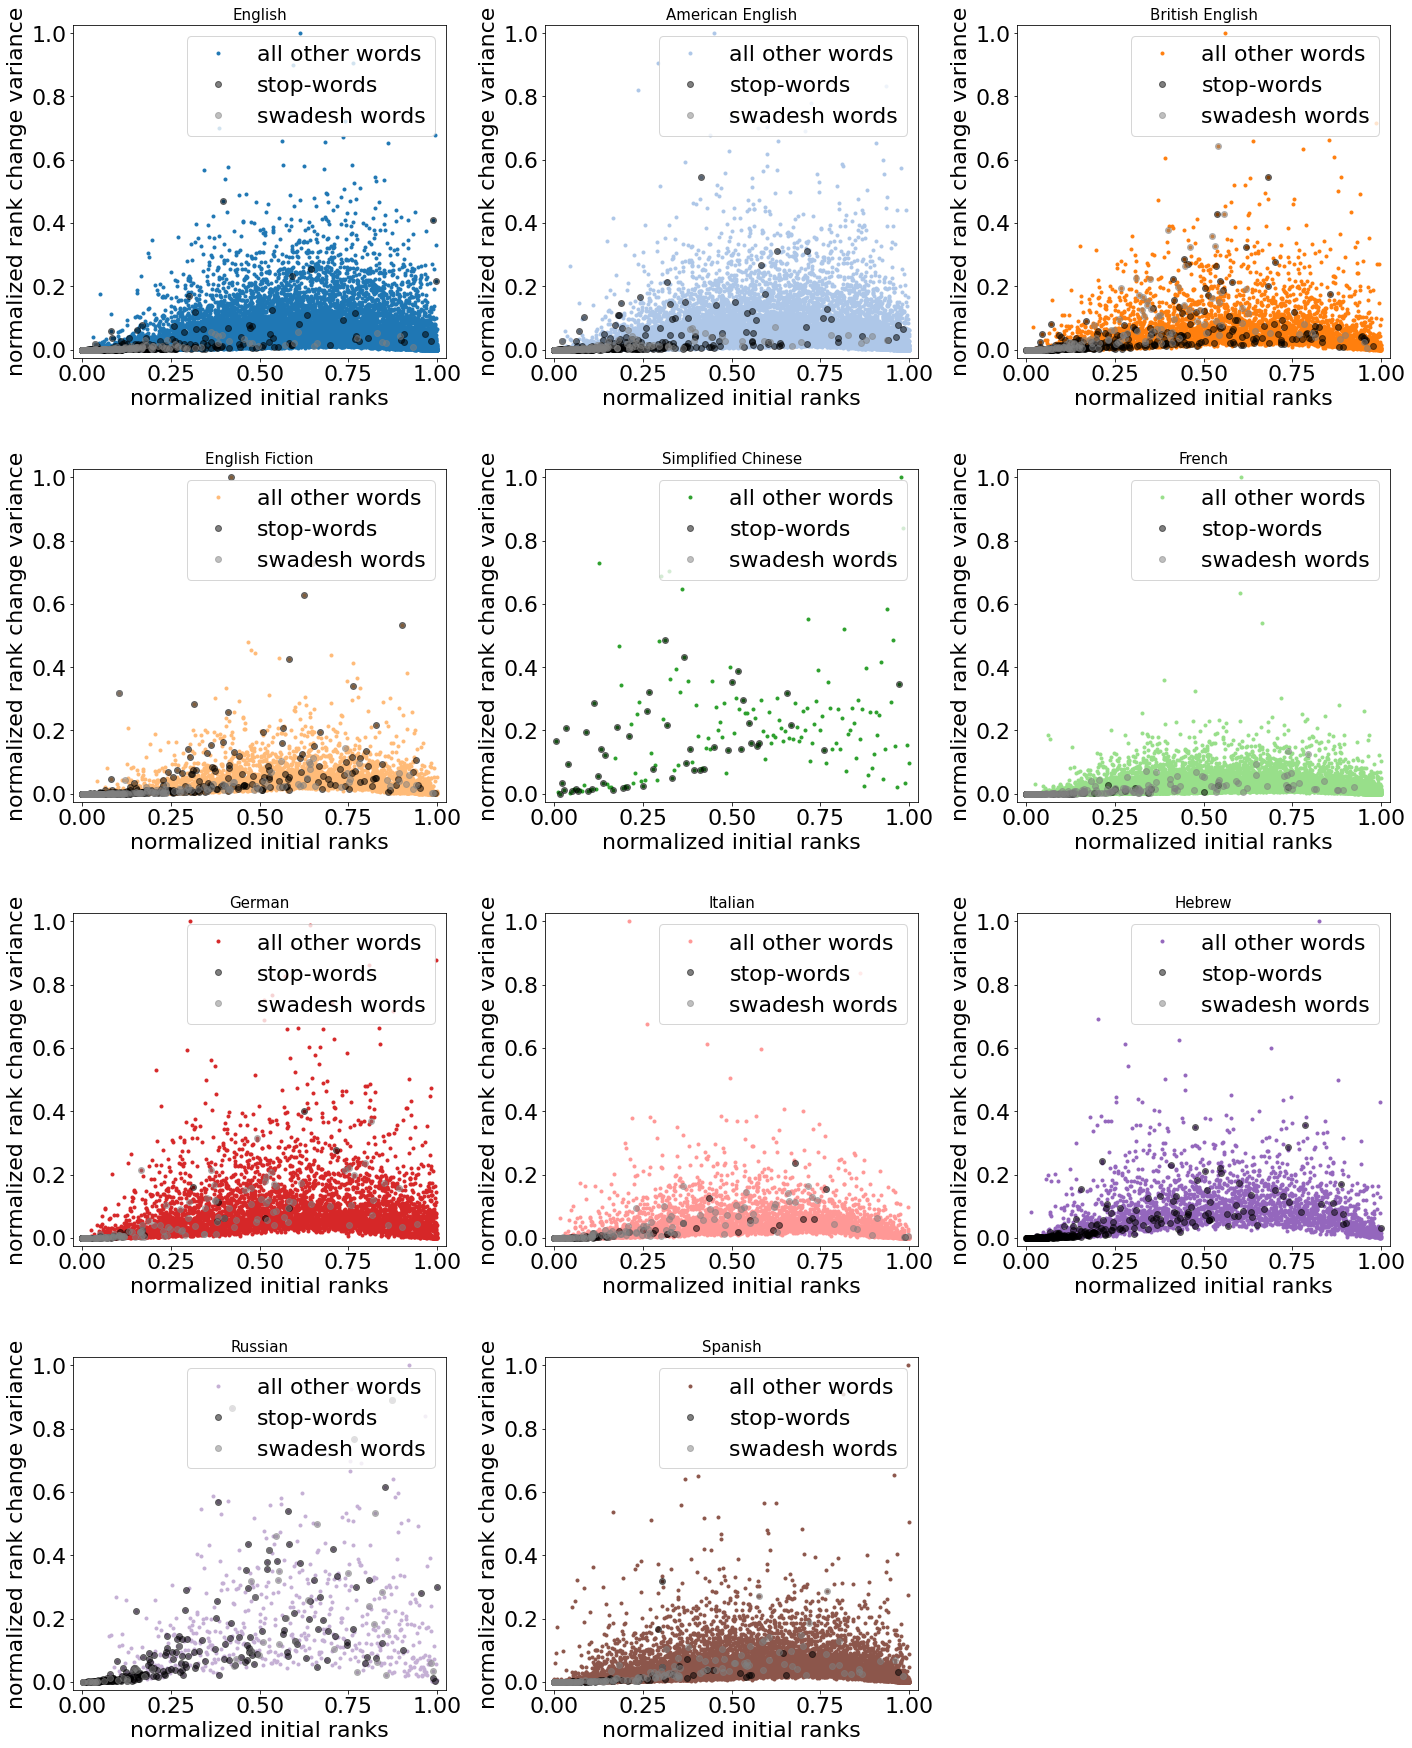

In [25]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
for l in l_codes:
    dayta = LA_RANKS[l]

    initial_ranks = dayta['ranks'][1900].sort_index()
    vocab_size = len(initial_ranks.values)
    initial_ranks_normed = initial_ranks.values / vocab_size
    initial_ranks_sw = initial_ranks[SW_LA[l]]
    initial_ranks_sw_normed = initial_ranks_sw.values / vocab_size
    initial_ranks_sd = initial_ranks[SD_LA[l]]
    initial_ranks_sd_normed = initial_ranks_sd.values / vocab_size
    drank_var = pd.DataFrame({'drank-variance':dayta['drank-variance']}).sort_index()
    max_norm = np.max(abs(drank_var)).values[0]
    drank_var_normed = drank_var / max_norm
    drank_var_sw = drank_var['drank-variance'][SW_LA[l]]
    drank_var_sw_normed = drank_var_sw / max_norm
    drank_var_sd = drank_var['drank-variance'][SD_LA[l]]
    drank_var_sd_normed = drank_var_sd / max_norm

    ax[l_plot_grids[l]].plot(initial_ranks_normed,drank_var_normed,'.',color=l_colors[l],label='all other words')
    ax[l_plot_grids[l]].plot(initial_ranks_sw_normed,drank_var_sw_normed,'.',color='black',label='stop-words',markersize=12,alpha=0.50)
    ax[l_plot_grids[l]].plot(initial_ranks_sd_normed,drank_var_sd_normed,'.',color='gray',label='swadesh words',markersize=12,alpha=0.50)
    ax[l_plot_grids[l]].set_xlim(0-0.025,1+0.025)
    ax[l_plot_grids[l]].set_ylim(0-0.025,1+0.025)
    ax[l_plot_grids[l]].set_xlabel('normalized initial ranks')
    ax[l_plot_grids[l]].set_ylabel('normalized rank change variance')
    ax[l_plot_grids[l]].set_title(l_labels[l],fontsize=15)
    ax[l_plot_grids[l]].legend(loc=1)

ax[3,2].axis('off')  
plt.tight_layout()
plt.savefig('figures/rank-change/rc-variance_vs_initial-ranks_la_4x3.png')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


alpha
beta
c
ratio1
ratio2
a


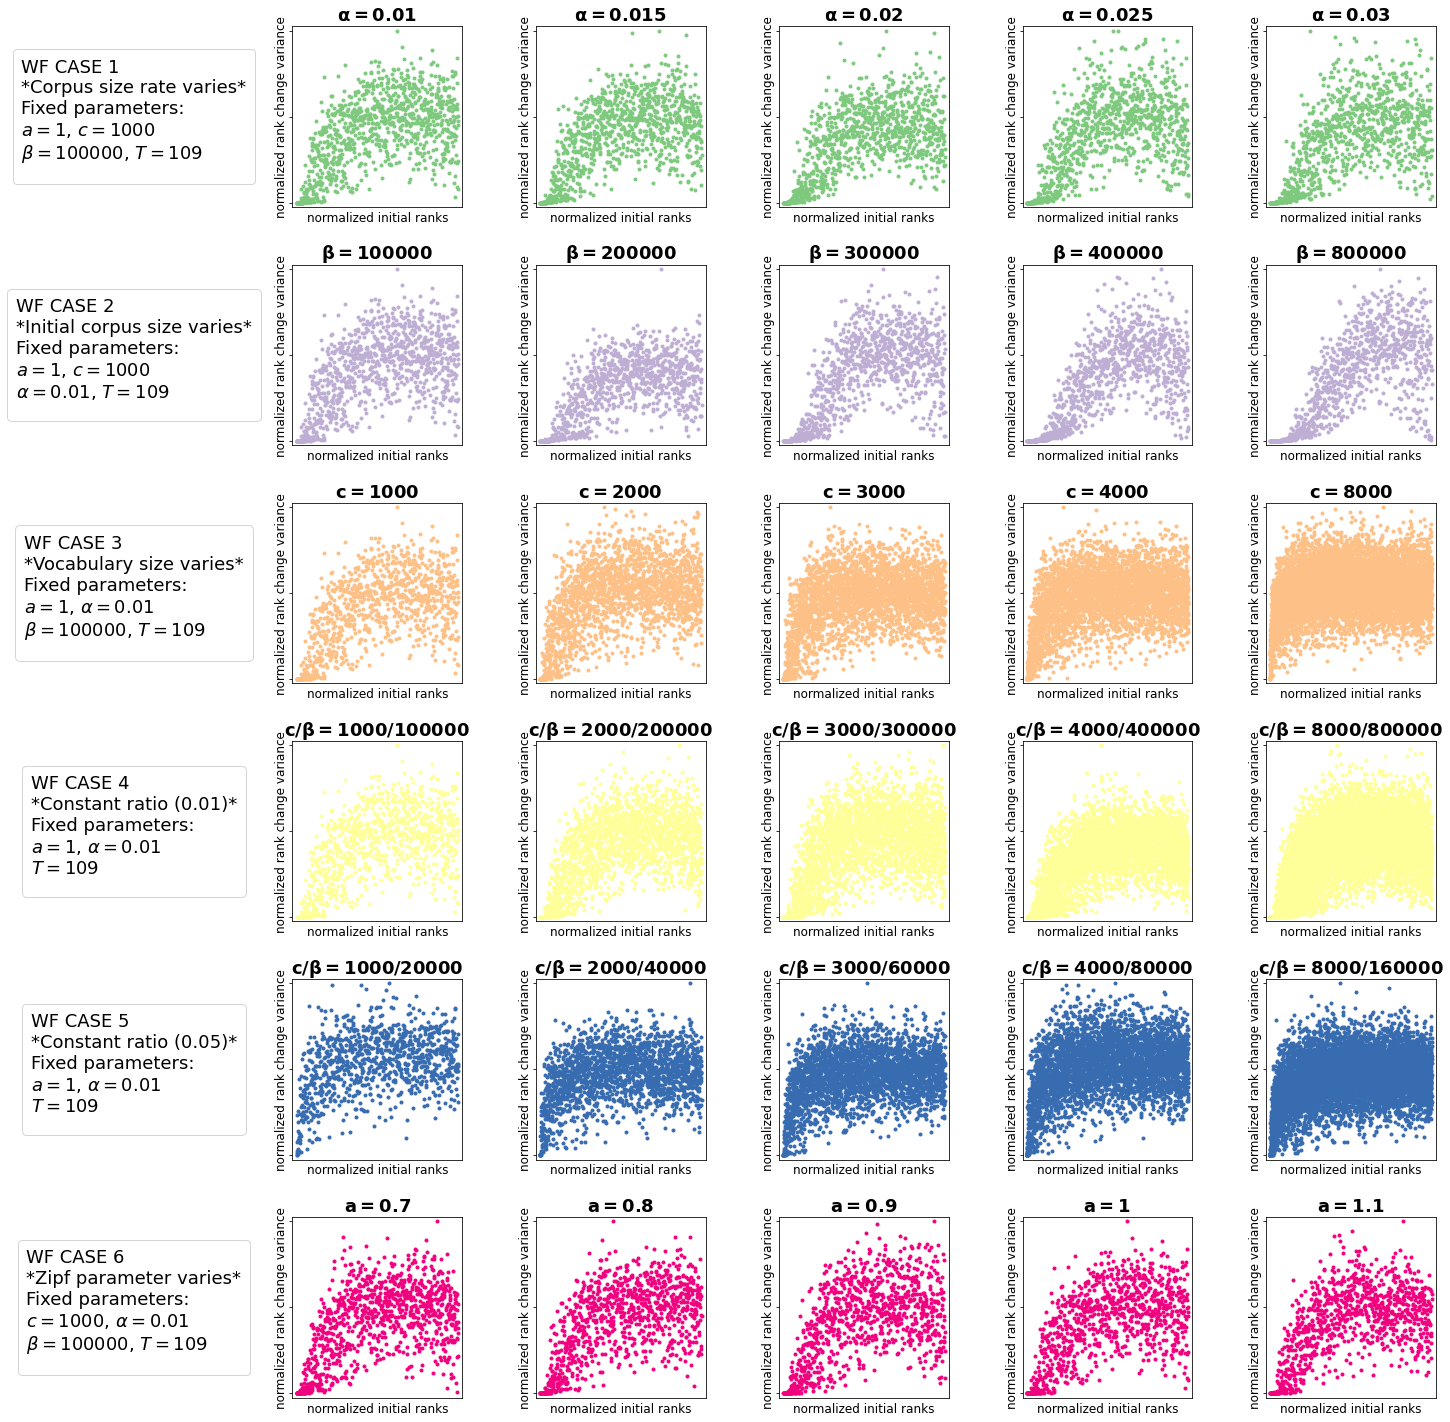

In [26]:
colors_accent = cm.get_cmap('Accent')
fig, ax = plt.subplots(6,6,figsize=(20.36,20),sharex=True,sharey=True)
for i, j in enumerate(WF_RANKS.keys()):
    ax[i,0].set_axis_off()
    ax[i,0].legend(loc=10,title=all_labels[j],title_fontsize=18)

for l, k in enumerate(WF_RANKS.keys()):
    print(k)
    for i, j in enumerate(all_params[k]):
        dayta = WF_RANKS[k][i]
        initial_ranks = dayta['ranks'][0].sort_index()
        initial_ranks_normed = initial_ranks.values / len(initial_ranks.values)
        drank_var = pd.DataFrame({'drank-variance':dayta['drank-variance']}).sort_index()
        drank_var_normed = drank_var / np.max(abs(drank_var)).values[0]

        ax[l,i+1].plot(initial_ranks_normed,drank_var_normed,'.',color=colors_accent(l),label='all other words')
        ax[l,i+1].set_xlim(0-0.025,1+0.025)
        ax[l,i+1].set_ylim(0-0.025,1+0.025)
        ax[l,i+1].set_xlabel('normalized initial ranks',fontsize=12)
        ax[l,i+1].set_ylabel('normalized rank change variance',fontsize=12)
        ax[l,i+1].set_title(all_variab[k]+str(all_params[k][i]),fontweight='bold',fontsize=18)

ax[5,i+1].axes.get_xaxis().set_ticks([])
plt.tight_layout(pad=0.50)
plt.savefig('figures/rank-change/rc-variance_vs_initial-ranks_wf_6x6.png')
plt.show()

## 4. BC Spaces with the Stopwords and Swadesh Words.

In [27]:
# load BC spaces
l_BC = {}
for l in l_codes:
    BC = pkl.load(open(precomp_gn_dir+'/bc_'+l+'.pkl','rb'))
    l_BC[l] = BC
    del BC

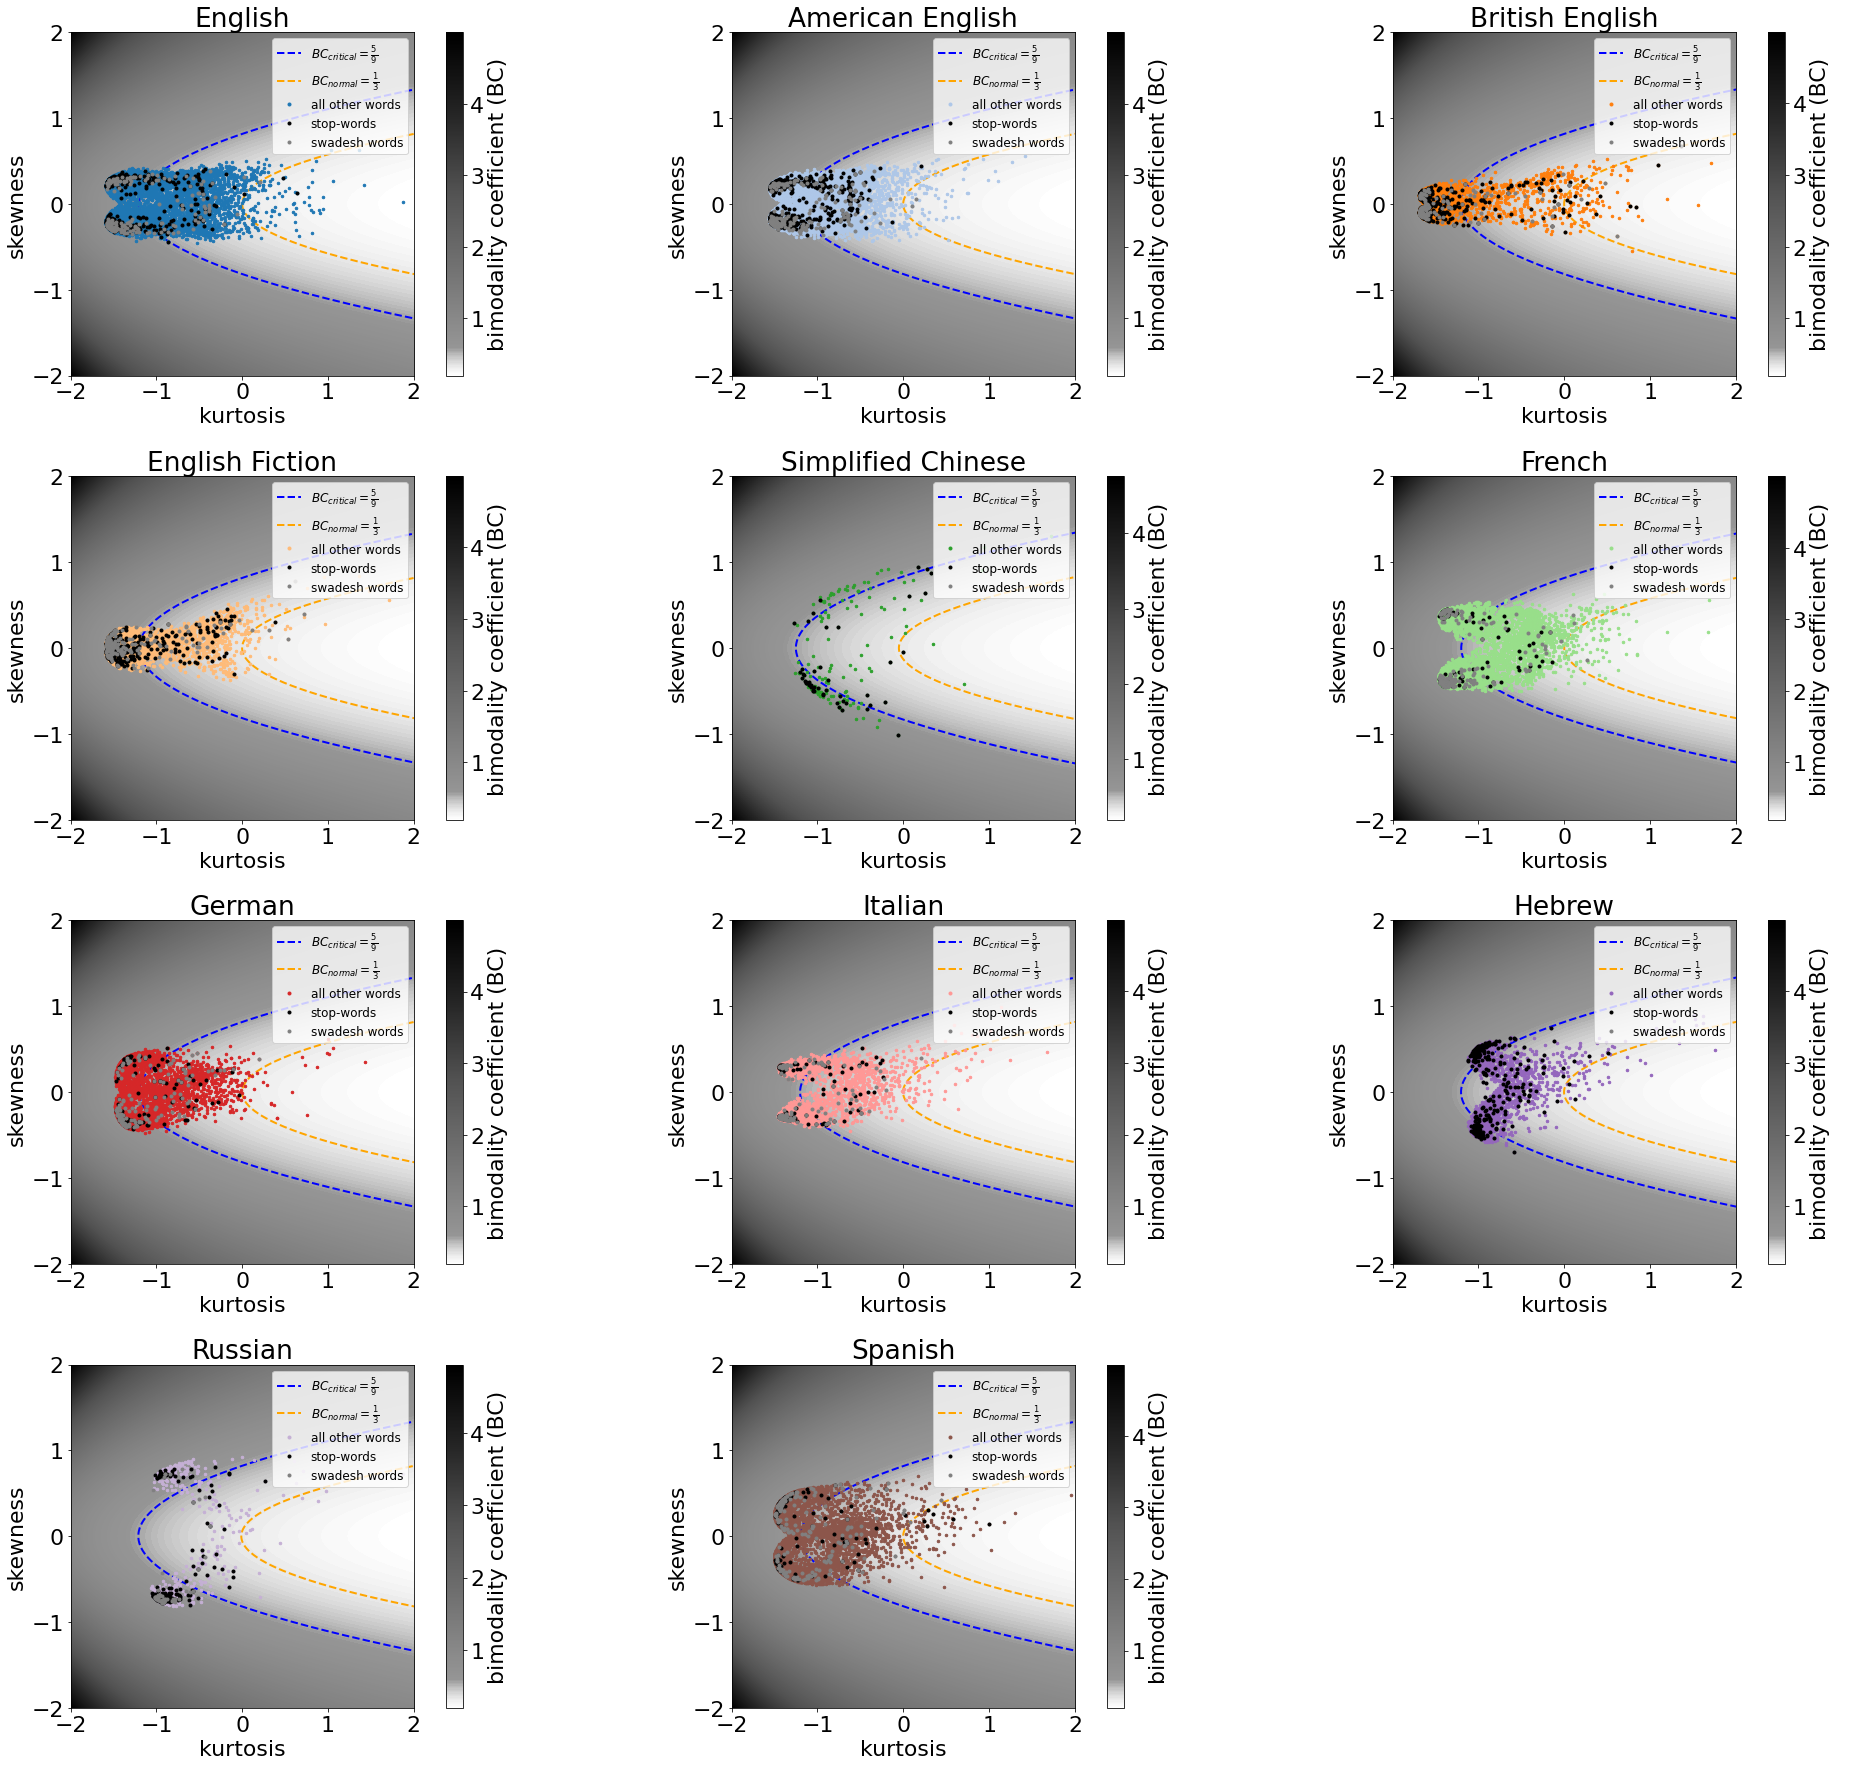

In [28]:
fig, ax = plt.subplots(4,3,figsize=(28,25))
for l in l_codes:
    lp.bimodality_coefficient_plot(data=l_BC[l],title=l_labels[l],grid_size=l_BC[l]['bc'].shape[0],color=mp.colors.to_hex(l_colors[l]),markersize_selected=10,legend=True,colorbar=True,ax=ax[l_plot_grids[l]])
    ax[l_plot_grids[l]].plot(l_BC[l]['m4'][0],l_BC[l]['m3'][0],'.',color=l_colors[l],label='all other words')
    ax[l_plot_grids[l]].plot(l_BC[l]['m4'][SW_LA[l]],l_BC[l]['m3'][SW_LA[l]],'.',color='black',label='stop-words')
    ax[l_plot_grids[l]].plot(l_BC[l]['m4'][SD_LA[l]],l_BC[l]['m3'][SD_LA[l]],'.',color='grey',label='swadesh words')
    ax[l_plot_grids[l]].legend(loc=1,fontsize=12)
ax[3,2].axis('off')
plt.tight_layout()
plt.savefig('figures/rank-change/bc_global-all_with-sw-and-sd_la_4x3.png')
plt.show()

## 5. Rank-Biased Overlap.

In [29]:
import rbo

In [30]:
LA_LIST = LA_RANKS[l]['olist']
rbo.RankingSimilarity(LA_LIST[2006].values,LA_LIST[2007].values).rbo()

0.9861711200415643

In [31]:
LA_RBO_ttp1 = {}
LA_RBO_ttp1_delta = {}
LA_RBO_ttp10 = {}
LA_RBO_ttp10_delta = {}
LA_RBO_initt = {}
LA_RBO_initt_delta = {}
for l in l_codes:
    LA_LIST = LA_RANKS[l]['olist']
    t_initial = LA_LIST.columns[0]
    
    # RBO t -- t+1
    ttp1 = []
    for i in list(LA_LIST.keys())[:-1]:
        ttp1.append(rbo.RankingSimilarity(LA_LIST[i+1].values,LA_LIST[i].values).rbo())
    LA_RBO_ttp1[l] = ttp1

    # delta RBO t -- t+1
    ttp1_delta = []
    for i in range(0,len(ttp1)-1):
        ttp1_delta.append(ttp1[i+1]-ttp1[i])
    LA_RBO_ttp1_delta[l] = ttp1_delta
    
    # RBO t -- t+10
    ttp10 = []
    for i in list(LA_LIST.keys())[:-10]:
        ttp10.append(rbo.RankingSimilarity(LA_LIST[i+10].values,LA_LIST[i].values).rbo())
    LA_RBO_ttp10[l] = ttp10

    # delta RBO t -- t+10
    ttp10_delta = []
    for i in range(0,len(ttp10)-1):
        ttp10_delta.append(ttp10[i+1]-ttp10[i])
    LA_RBO_ttp10_delta[l] = ttp10_delta
    
    # RBO 0 -- t
    initt = []
    for i in list(LA_LIST.keys()):
        initt.append(rbo.RankingSimilarity(LA_LIST[t_initial].values,LA_LIST[i].values).rbo())
    LA_RBO_initt[l] = initt
    
    # delta RBO 0 -- t
    initt_delta = []
    for i in range(0,len(initt)-1):
        initt_delta.append(initt[i+1]-initt[i])
    LA_RBO_initt_delta[l] = initt_delta
    
LA_RBO_ttp1 = pd.DataFrame(LA_RBO_ttp1).T
LA_RBO_ttp1_delta = pd.DataFrame(LA_RBO_ttp1_delta).T
LA_RBO_ttp10 = pd.DataFrame(LA_RBO_ttp10).T
LA_RBO_ttp10_delta = pd.DataFrame(LA_RBO_ttp10_delta).T
LA_RBO_initt = pd.DataFrame(LA_RBO_initt).T
LA_RBO_initt_delta = pd.DataFrame(LA_RBO_initt_delta).T

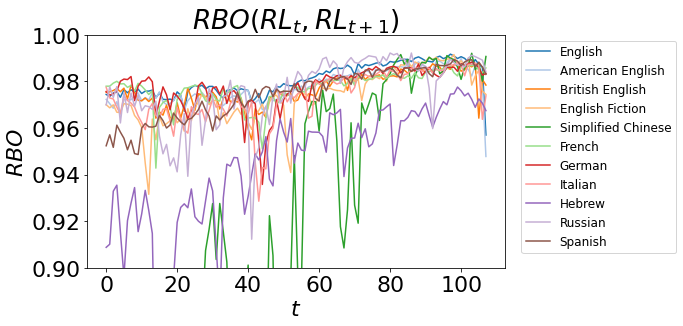

In [32]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
for l in l_codes:
    ax.plot(LA_RBO_ttp1.loc[l,:],color=l_colors[l],label=l_labels[l])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$RBO$')
ax.set_ylim(0.90,1)
ax.set_title(r'$RBO(RL_{t},RL_{t+1})$')
ax.legend(fontsize=12, bbox_to_anchor=(1.025, 1), loc='upper left')
plt.tight_layout()
plt.savefig('figures/rank-change/rbo-ttp1_la_1x2.png')
plt.show()

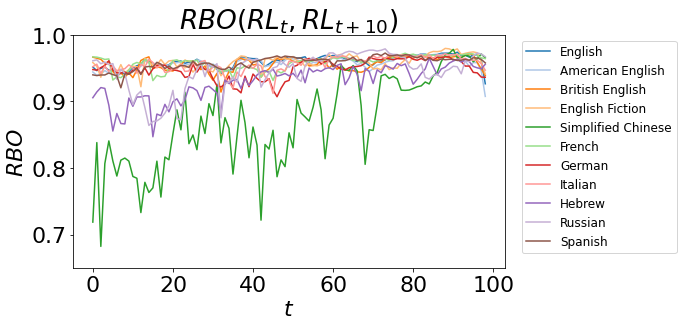

In [33]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
for l in l_codes:
    ax.plot(LA_RBO_ttp10.loc[l,:],color=l_colors[l],label=l_labels[l])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$RBO$')
ax.set_ylim(0.65,1)
ax.set_title(r'$RBO(RL_{t},RL_{t+10})$')
ax.legend(fontsize=12, bbox_to_anchor=(1.025, 1), loc='upper left')
plt.tight_layout()
plt.savefig('figures/rank-change/rbo-ttp10_la_1x2.png')
plt.show()

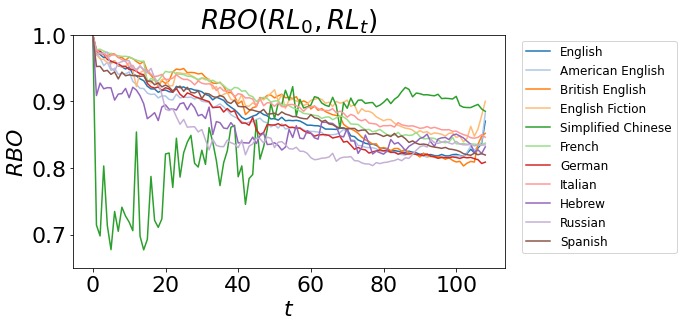

In [34]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
for l in l_codes:
    ax.plot(LA_RBO_initt.loc[l,:],color=l_colors[l],label=l_labels[l])
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$RBO$')
ax.set_ylim(0.65,1)
ax.set_title(r'$RBO(RL_{0},RL_{t})$')
ax.legend(fontsize=12, bbox_to_anchor=(1.025, 1), loc='upper left')
plt.tight_layout()
plt.savefig('figures/rank-change/rbo-initt_la_1x2.png')
plt.show()

In [35]:
WF_RBO_ttp1 = {}
WF_RBO_ttp1_delta = {}
WF_RBO_ttp10 = {}
WF_RBO_ttp10_delta = {}
WF_RBO_initt = {}
WF_RBO_initt_delta = {}
for wf_i in WF_RANKS.keys():
    WF_RBO_ttp1[wf_i] = {}
    WF_RBO_ttp1_delta[wf_i] = {}
    WF_RBO_ttp10[wf_i] = {}
    WF_RBO_ttp10_delta[wf_i] = {}
    WF_RBO_initt[wf_i] = {}
    WF_RBO_initt_delta[wf_i] = {}
    for wf_j in range(0,len(WF_RANKS[wf_i])):
        WF_LIST = WF_RANKS[wf_i][wf_j]['olist']
        t_initial = WF_LIST.columns[0]

        # RBO t -- t+1
        ttp1 = []
        for i in list(WF_LIST.keys())[:-1]:
            ttp1.append(rbo.RankingSimilarity(WF_LIST[i+1].values,WF_LIST[i].values).rbo())
        WF_RBO_ttp1[wf_i][wf_j] = ttp1

        # delta RBO t -- t+1
        ttp1_delta = []
        for i in range(0,len(ttp1)-1):
            ttp1_delta.append(ttp1[i+1]-ttp1[i])
        WF_RBO_ttp1_delta[wf_i][wf_j] = ttp1_delta

        # RBO t -- t+10
        ttp10 = []
        for i in list(WF_LIST.keys())[:-10]:
            ttp10.append(rbo.RankingSimilarity(WF_LIST[i+10].values,WF_LIST[i].values).rbo())
        WF_RBO_ttp10[wf_i][wf_j] = ttp10

        # delta RBO t -- t+10
        ttp10_delta = []
        for i in range(0,len(ttp10)-1):
            ttp10_delta.append(ttp10[i+1]-ttp10[i])
        WF_RBO_ttp10_delta[wf_i][wf_j] = ttp10_delta

        # RBO 0 -- t
        initt = []
        for i in list(WF_LIST.keys()):
            initt.append(rbo.RankingSimilarity(WF_LIST[t_initial].values,WF_LIST[i].values).rbo())
        WF_RBO_initt[wf_i][wf_j] = initt

        # delta RBO 0 -- t
        initt_delta = []
        for i in range(0,len(initt)-1):
            initt_delta.append(initt[i+1]-initt[i])
        WF_RBO_initt_delta[wf_i][wf_j] = initt_delta
        
WF_RBO_ttp1 = pd.DataFrame(WF_RBO_ttp1).T
WF_RBO_ttp1_delta = pd.DataFrame(WF_RBO_ttp1_delta).T
WF_RBO_ttp10 = pd.DataFrame(WF_RBO_ttp10).T
WF_RBO_ttp10_delta = pd.DataFrame(WF_RBO_ttp10_delta).T
WF_RBO_initt = pd.DataFrame(WF_RBO_initt).T
WF_RBO_initt_delta = pd.DataFrame(WF_RBO_initt_delta).T

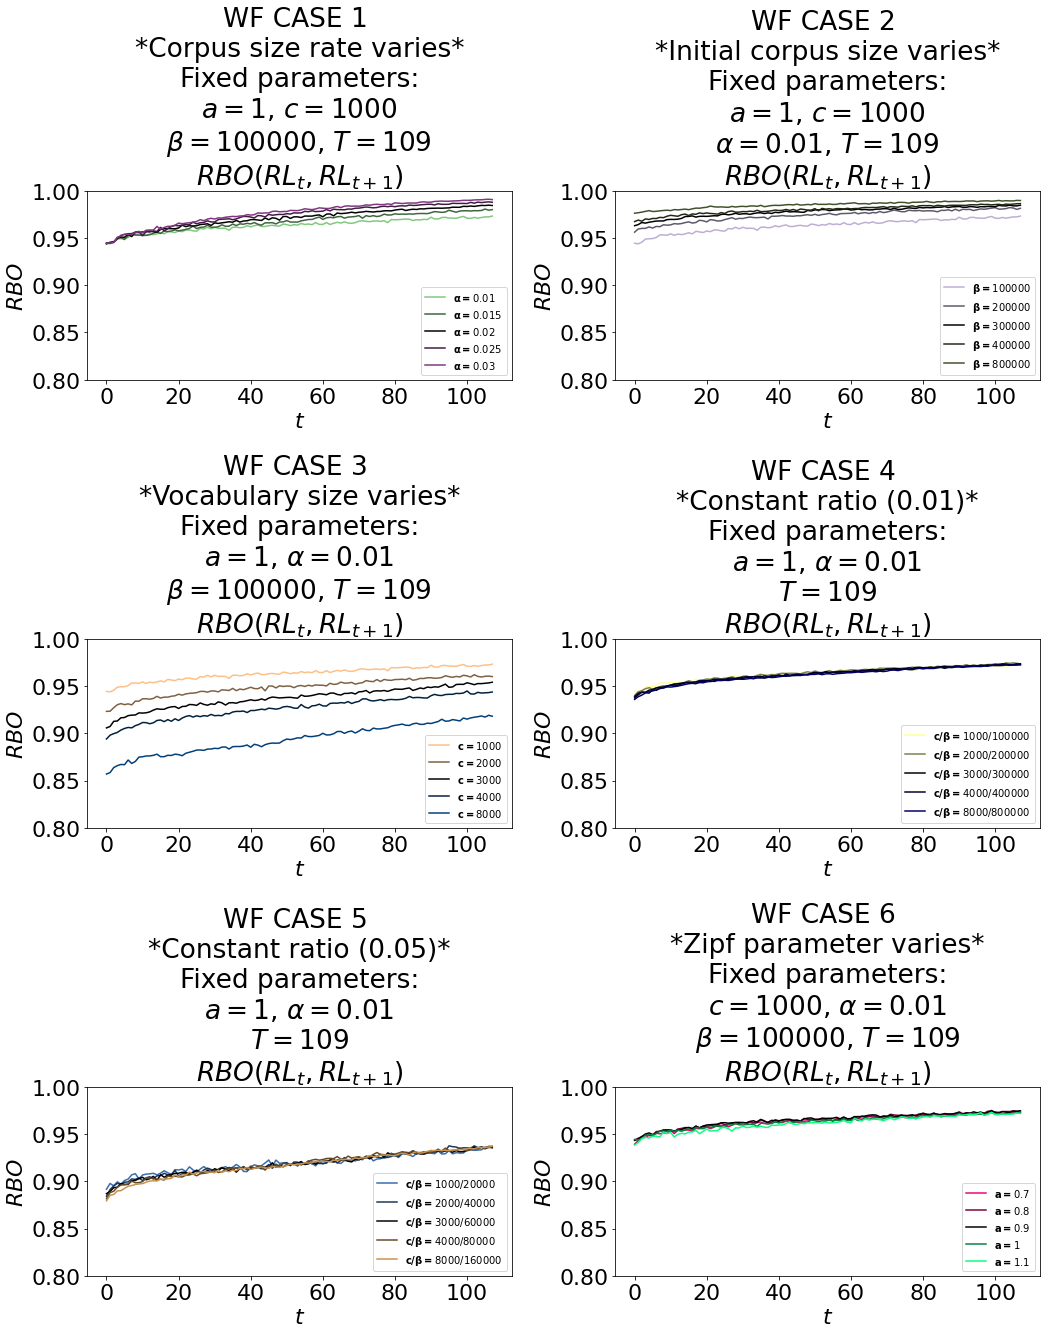

In [40]:
colors_accent = cm.get_cmap('Accent')
ax_vect = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
linestyles = ['-','--','-.',':','-']
fig, ax = plt.subplots(3,2,figsize=(15,19))
for kk, k in enumerate(WF_RBO_ttp1.T.keys()):
    
    color = cl.to_hex(colors_accent(kk))
    color_complement = lp.get_complementary(color)
    c = cl.ColorConverter().to_rgb
    c_cmap = lp.make_colormap([c(color), c('black'), 0.50, c('black'), c(color_complement)])
    index_color = c_cmap(np.linspace(0,1,5))
    
    for j in range(0,5):
        rbo_ttp1_all = WF_RBO_ttp1.T[k][j]
        ax[ax_vect[kk]].plot(rbo_ttp1_all,color=index_color[j],label=all_variab[k]+str(all_params[k][j]))
    ax[ax_vect[kk]].legend(loc=4,fontsize=10)
    ax[ax_vect[kk]].set_xlabel(r'$t$')
    ax[ax_vect[kk]].set_ylabel(r'$RBO$')
    ax[ax_vect[kk]].set_ylim(0.80,1)
    ax[ax_vect[kk]].set_title(all_labels[k]+'\n'+r'$RBO(RL_{t},RL_{t+1})$')

plt.tight_layout()
plt.savefig('figures/rank-change/rbo-ttp1_wf_3x2.png')
plt.show()

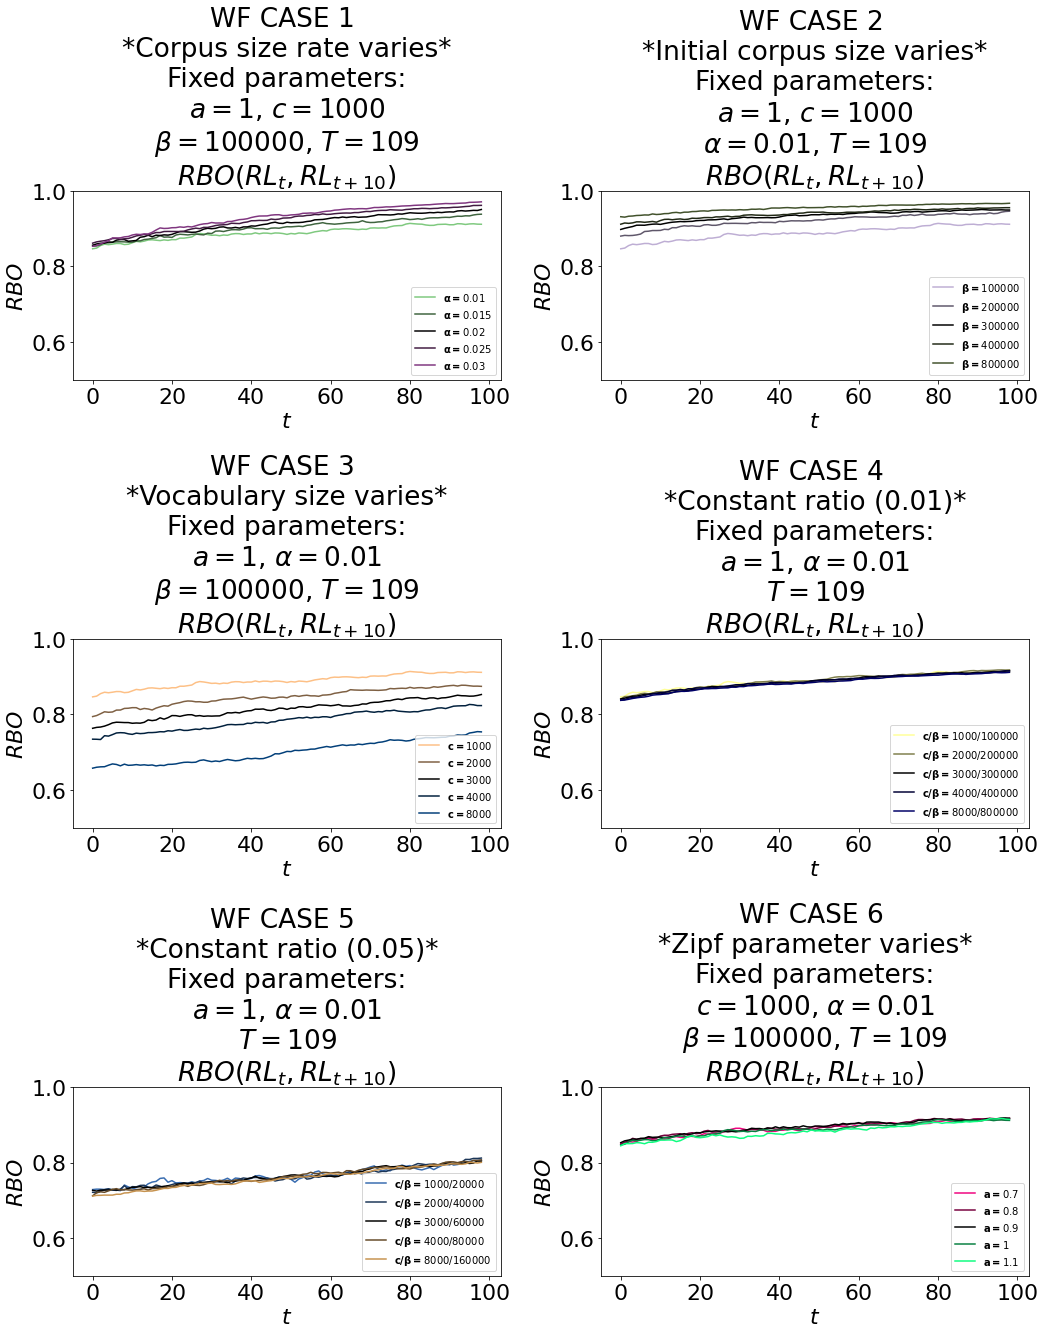

In [41]:
colors_accent = cm.get_cmap('Accent')
ax_vect = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
linestyles = ['-','--','-.',':','-']
fig, ax = plt.subplots(3,2,figsize=(15,19))
for kk, k in enumerate(WF_RBO_ttp1.T.keys()):
    
    color = cl.to_hex(colors_accent(kk))
    color_complement = lp.get_complementary(color)
    c = cl.ColorConverter().to_rgb
    c_cmap = lp.make_colormap([c(color), c('black'), 0.50, c('black'), c(color_complement)])
    index_color = c_cmap(np.linspace(0,1,5))
    
    for j in range(0,5):
        rbo_ttp10_all = WF_RBO_ttp10.T[k][j]
        ax[ax_vect[kk]].plot(rbo_ttp10_all,color=index_color[j],label=all_variab[k]+str(all_params[k][j]))
    ax[ax_vect[kk]].legend(loc=4,fontsize=10)
    ax[ax_vect[kk]].set_xlabel(r'$t$')
    ax[ax_vect[kk]].set_ylabel(r'$RBO$')
    ax[ax_vect[kk]].set_ylim(0.50,1)
    ax[ax_vect[kk]].set_title(all_labels[k]+'\n'+r'$RBO(RL_{t},RL_{t+10})$')

plt.tight_layout()
plt.savefig('figures/rank-change/rbo-ttp10_wf_3x2.png')
plt.show()

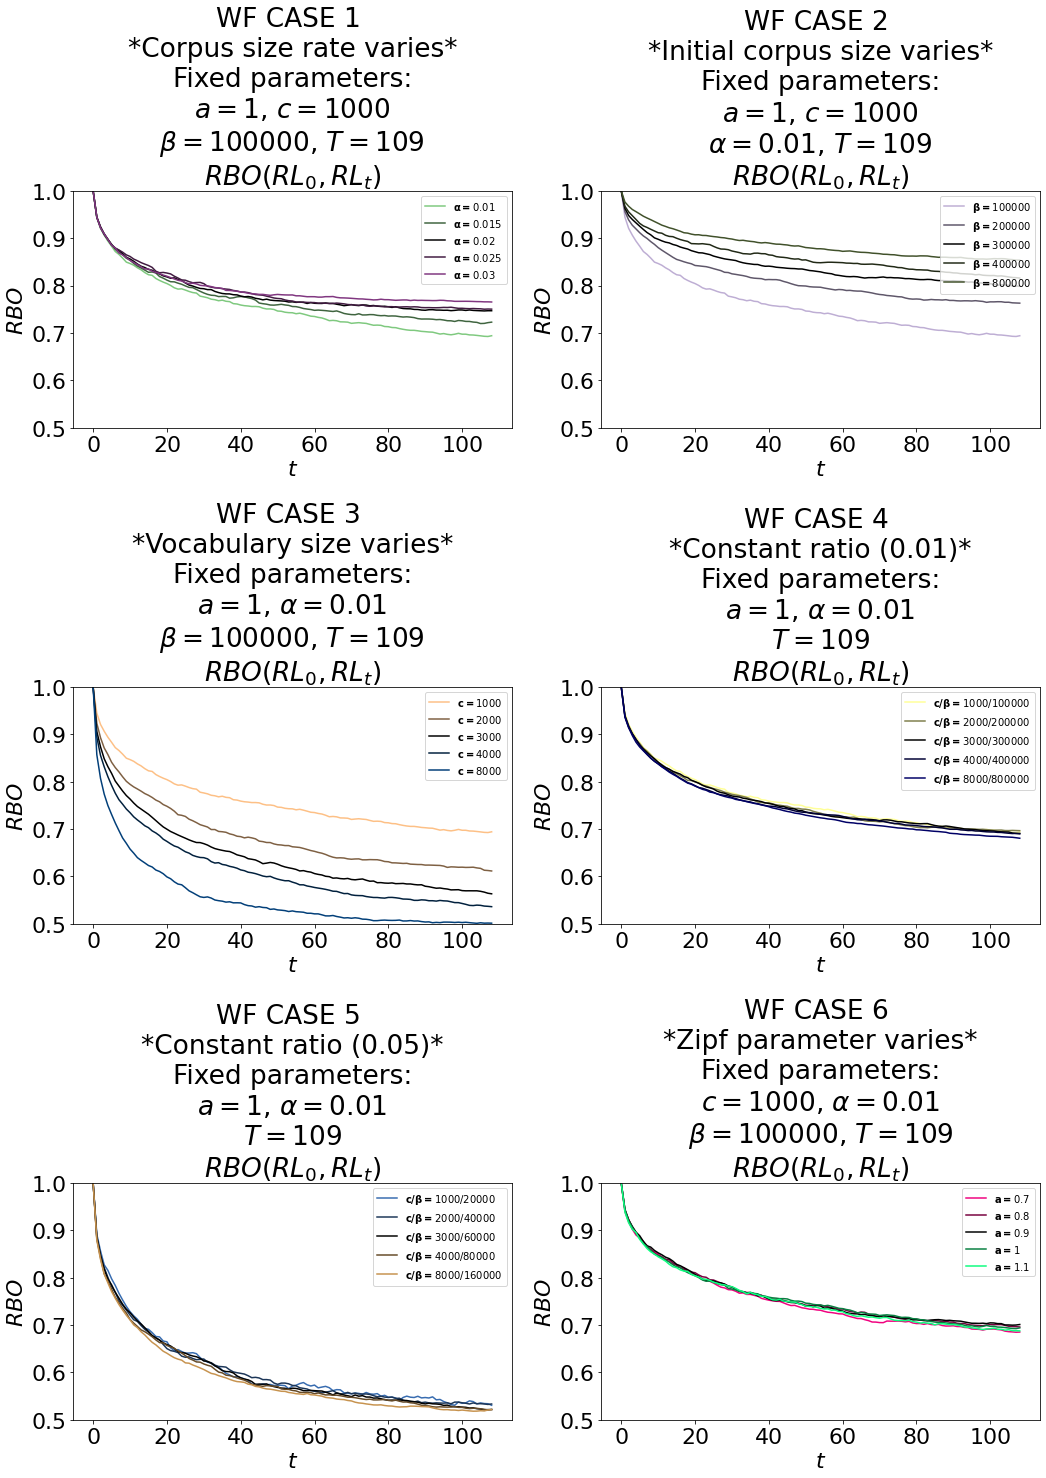

In [44]:
#### colors_accent = cm.get_cmap('Accent')
ax_vect = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
linestyles = ['-','--','-.',':','-']
fig, ax = plt.subplots(3,2,figsize=(15,21))
for kk, k in enumerate(WF_RBO_initt.T.keys()):
    
    color = cl.to_hex(colors_accent(kk))
    color_complement = lp.get_complementary(color)
    c = cl.ColorConverter().to_rgb
    c_cmap = lp.make_colormap([c(color), c('black'), 0.50, c('black'), c(color_complement)])
    index_color = c_cmap(np.linspace(0,1,5))
    
    for j in range(0,5):
        rbo_initt_all = WF_RBO_initt.T[k][j]
        ax[ax_vect[kk]].plot(rbo_initt_all,color=index_color[j],label=all_variab[k]+str(all_params[k][j]))
    ax[ax_vect[kk]].legend(loc=1,fontsize=10)
    ax[ax_vect[kk]].set_xlabel(r'$t$')
    ax[ax_vect[kk]].set_ylabel(r'$RBO$')
    ax[ax_vect[kk]].set_ylim(0.50,1)
    ax[ax_vect[kk]].set_title(all_labels[k]+'\n'+r'$RBO(RL_{0},RL_{t})$')

plt.tight_layout()
plt.savefig('figures/rank-change/rbo-initt_wf_3x2.png')
plt.show()